In [ ]:
import argparse
import pandas as pd
import pickle
from scripts.imports import *
from scripts.parallel_blocks import *
from scripts.FSC_dataframe_phoreal import FSC_dataframe

# Function to parse command line arguments
def parse_args():
    parser = argparse.ArgumentParser(description="Generate and save a concatenated dataframe from multiple directories.")
    parser.add_argument('output_pickle', type=str, help='Name of the output pickle file (without extension)')
    parser.add_argument('--width', type=float, default=5, help='Width of the box (default: 0.05)')
    parser.add_argument('--height', type=float, default=5, help='Height of the box (default: 0.05)')
    parser.add_argument('--small_box', type=float, default=1, help='Size of the small box (default: 0.005)')
    parser.add_argument('--threshold', type=int, default=1, help='Data threshold value (default: 2)')
    parser.add_argument('--alt_thresh', type=int, default=80, help='Altitude threshold value (default: 90)')
    parser.add_argument('--rebinned', type=int, default=0, help='Rebinned into specified meter resolution')
    parser.add_argument('--method', type=str, default='normal', help='Method for probability distribution')
    parser.add_argument('--site', type=str, default='all', help='restrict to specific site if necessary')
    parser.add_argument('--outlier_removal', type=float, default=0, help='outlier_removal by z_score')
    return parser.parse_args()

# Main function
def main():

    output_pickle = 'dataset'

    dirpaths = [
        # '../data_store/data/sodankyla_full/',
        # '../data_store/data/delta_junction/',
        # '../data_store/data/marcell_MN/',
        # '../data_store/data/lacclair/',
        # '../data_store/data/torgnon/',
        '../data_store/data/oregon_yp/'
    ]
        
    csv_path = 'snow_cam_details.csv'
    excel_df = pd.read_csv(csv_path).drop('Image', axis=1)
    
    output_pickle_file = f"{output_pickle}.pkl"
    checkpoint_file = f"{output_pickle}_checkpoint.pkl"

    width=5
    height=5
    threshold=1
    small_box=10
    alt_thresh=80
    rebinned=30
    method='bimodal'
    outlier_removal=2
    loss='linear'
    
    # Load progress if checkpoint exists
    if os.path.exists(checkpoint_file):
        with open(checkpoint_file, 'rb') as f:
            processed_indices, partial_df = pickle.load(f)
        print(f"Resuming from checkpoint. Already processed: {processed_indices}")
    else:
        processed_indices = set()
        partial_df = pd.DataFrame()

    for dir_idx, dirpath in enumerate(dirpaths):
        foldername = dirpath.split('/')[-2]
        
        all_ATL03, all_ATL08 = track_pairs(dirpath)
        total_indices = len(all_ATL03)

        for i in range(total_indices):
            # Skip already processed indices
            if (dir_idx, i) in processed_indices:
                continue

            try:
                filedate = datetime_to_date(parse_filename_datetime(all_ATL03[i]))

                if ((excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername)).any():
                    coords = (excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'x_coord'].iloc[0],\
                              excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'y_coord'].iloc[0])
                    altitude = excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'Altitude'].iloc[0]
                    
                    df = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i],
                                                                coords = coords,width=width,height=height,
                                                                file_index = i,loss=loss, graph_detail=0,
                                                               altitude=altitude, threshold=threshold, small_box=small_box,\
                                                                  alt_thresh=alt_thresh, rebinned=rebinned, method=method,
                                                                  outlier_removal=outlier_removal)
                                                                  
                    df['FSC'] = excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'FSC'].iloc[0]
                    df['TreeSnow'] = excel_df.loc[(excel_df['Date']==filedate) & (excel_df['Camera']==foldername), 'Tree Snow'].iloc[0]

                    # Append new data to the partial dataframe
                    partial_df = pd.concat([partial_df, df], ignore_index=True)

                    # print(partial_df)

                    # Update the processed indices
                    processed_indices.add((dir_idx, i))

                    # Save checkpoint after each index
                    with open(checkpoint_file, 'wb') as f:
                        pickle.dump((processed_indices, partial_df), f)
                    print(f"Checkpoint saved to {checkpoint_file}")

            except Exception as e:
                print(f"Error processing {dirpath} index {i}: {e}")
                continue

    # Save final results
    partial_df.reset_index(drop=True, inplace=True)
    partial_df.to_pickle(output_pickle_file)

    # Clean up checkpoint
    if os.path.exists(checkpoint_file):
        os.remove(checkpoint_file)

    print(f"Dataframe saved to {output_pickle_file}")

if __name__ == '__main__':
    main()

Resuming from checkpoint. Already processed: {(0, 1), (0, 2), (0, 0)}
../data_store/data/oregon_yp/ 3


# Sodankyla

#### Arctan loss, f_scale = .1

Nothing in rebinned section for sodankyla_full file 0's beam 3.
Nothing in rebinned section for sodankyla_full file 0's beam 4.
Nothing in rebinned section for sodankyla_full file 0's beam 5.
Nothing in rebinned section for sodankyla_full file 0's beam 6.


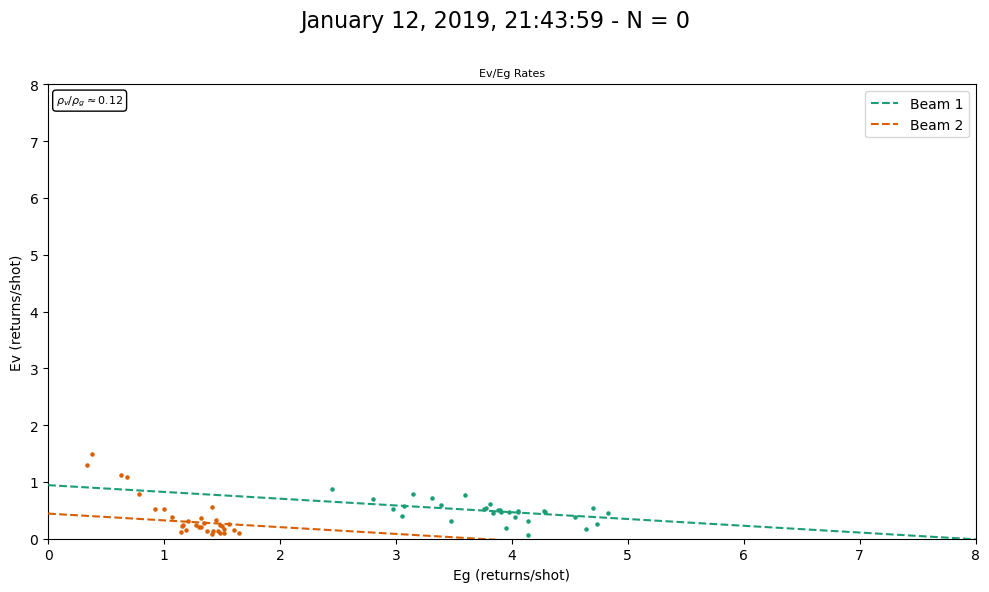

Nothing in rebinned section for sodankyla_full file 1's beam 1.
Nothing in rebinned section for sodankyla_full file 1's beam 2.


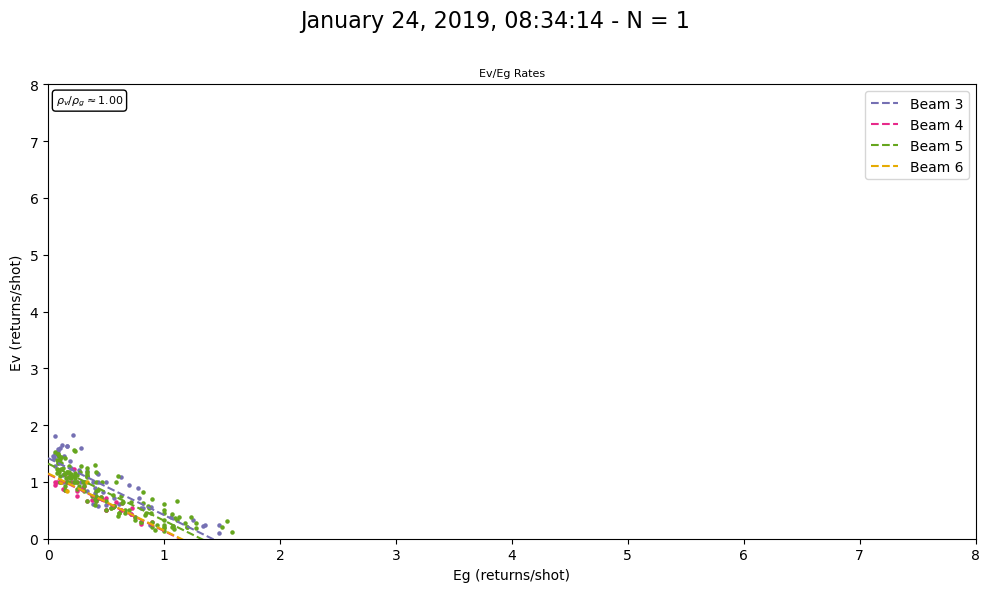

Nothing in rebinned section for sodankyla_full file 2's beam 2.
Nothing in rebinned section for sodankyla_full file 2's beam 3.
Nothing in rebinned section for sodankyla_full file 2's beam 4.
Nothing in rebinned section for sodankyla_full file 2's beam 5.
Nothing in rebinned section for sodankyla_full file 2's beam 6.


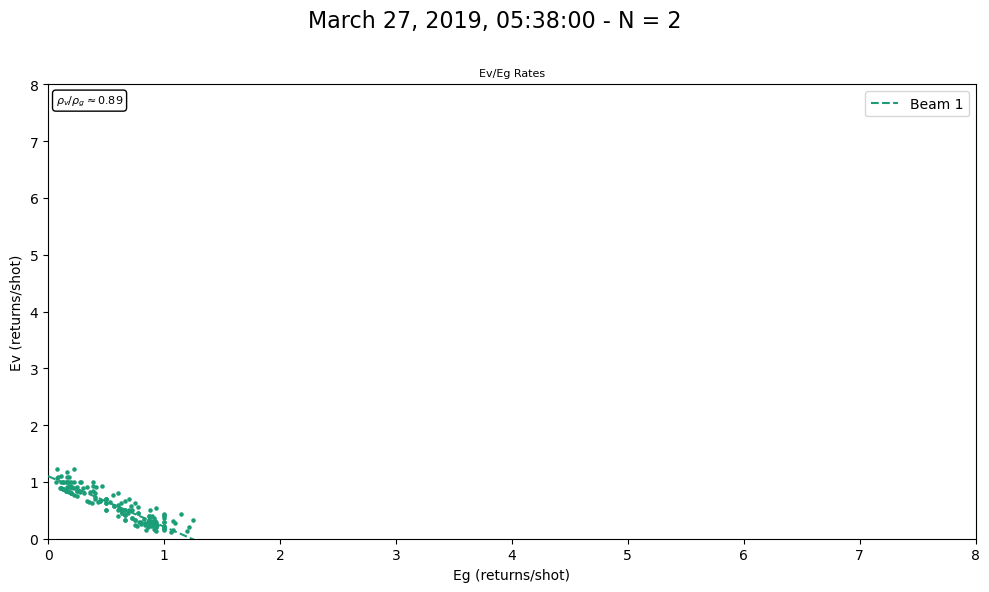

Nothing in rebinned section for sodankyla_full file 3's beam 5.
Nothing in rebinned section for sodankyla_full file 3's beam 6.


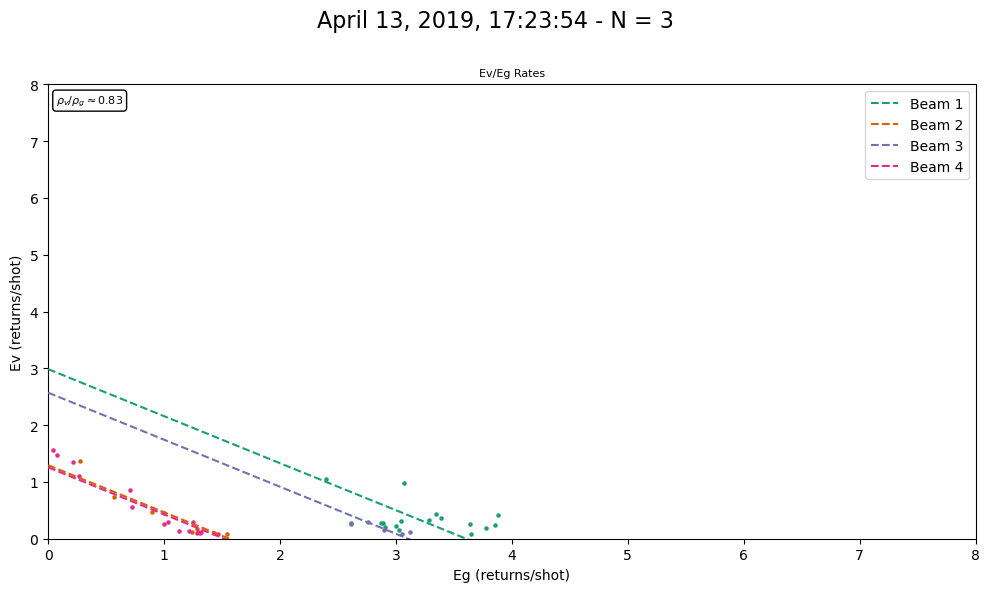

Nothing in rebinned section for sodankyla_full file 4's beam 1.
Nothing in rebinned section for sodankyla_full file 4's beam 2.
Nothing in rebinned section for sodankyla_full file 4's beam 3.
Nothing in rebinned section for sodankyla_full file 4's beam 4.


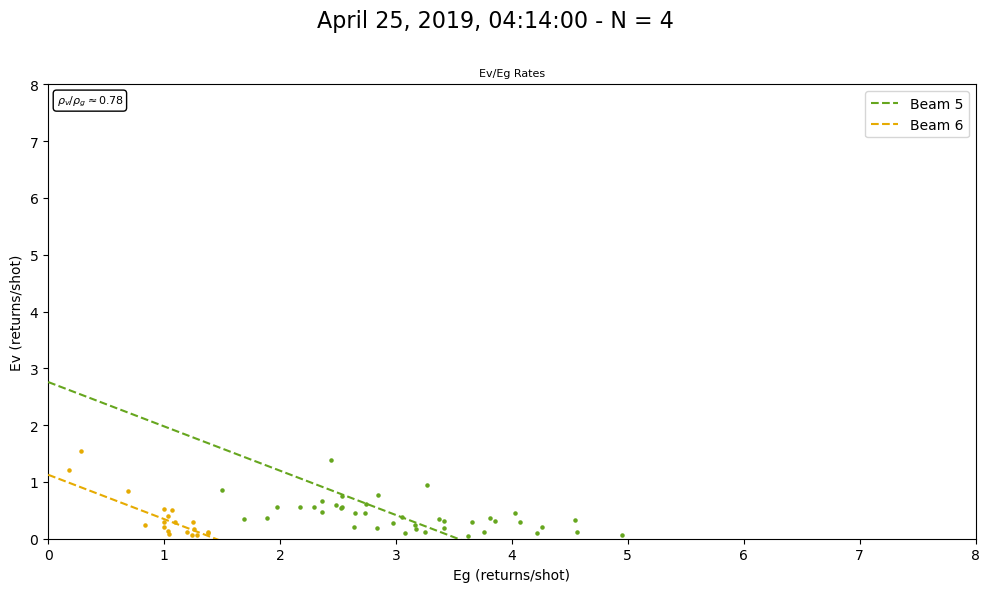

Nothing in rebinned section for sodankyla_full file 5's beam 1.
Nothing in rebinned section for sodankyla_full file 5's beam 2.
Nothing in rebinned section for sodankyla_full file 5's beam 3.
Nothing in rebinned section for sodankyla_full file 5's beam 4.


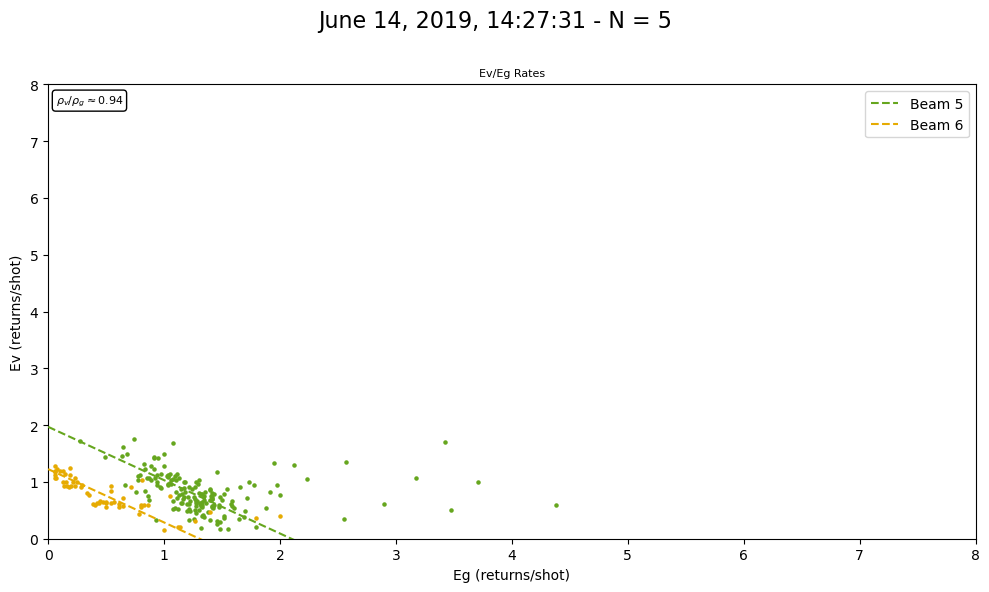

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 6's beam 3.
Nothing in rebinned section for sodankyla_full file 6's beam 4.
Nothing in rebinned section for sodankyla_full file 6's beam 5.
Nothing in rebinned section for sodankyla_full file 6's beam 6.


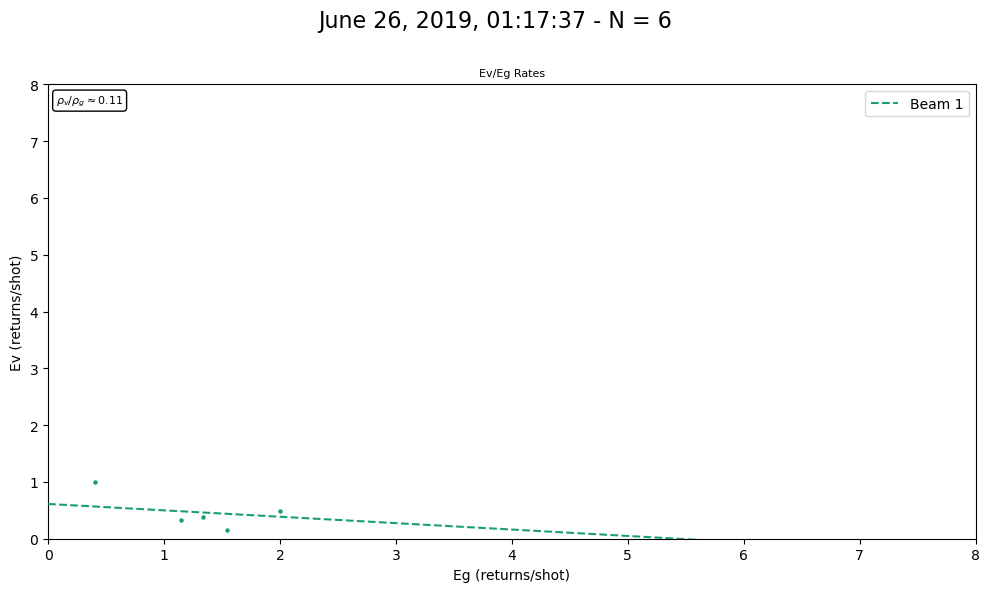

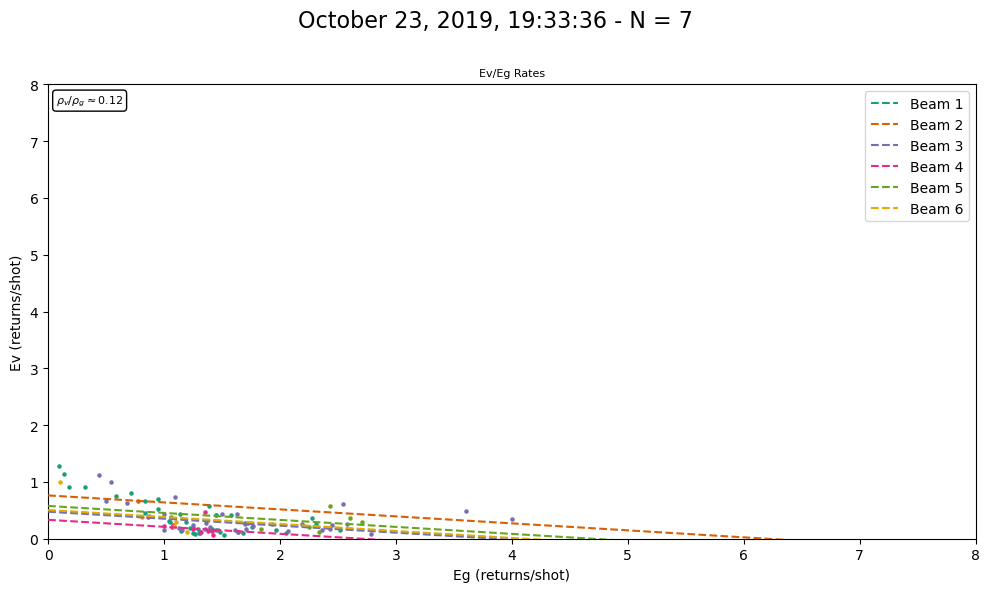

Nothing in rebinned section for sodankyla_full file 8's beam 1.
Nothing in rebinned section for sodankyla_full file 8's beam 2.


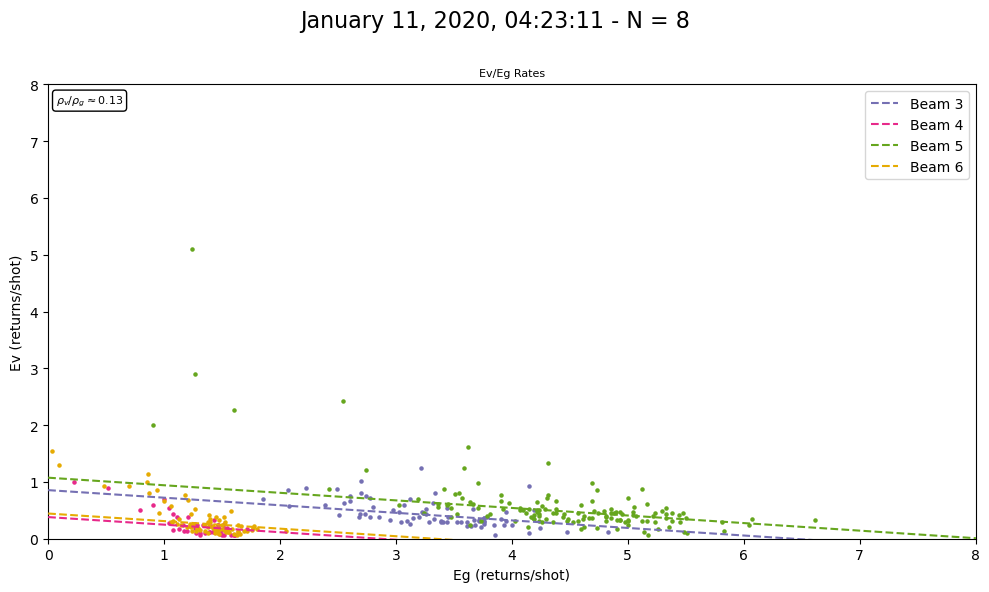

Nothing in rebinned section for sodankyla_full file 9's beam 1.
Nothing in rebinned section for sodankyla_full file 9's beam 2.
Nothing in rebinned section for sodankyla_full file 9's beam 3.
Nothing in rebinned section for sodankyla_full file 9's beam 4.
Nothing in rebinned section for sodankyla_full file 9's beam 5.
Nothing in rebinned section for sodankyla_full file 9's beam 6.
Nothing in rebinned section for sodankyla_full file 10's beam 1.
Nothing in rebinned section for sodankyla_full file 10's beam 2.


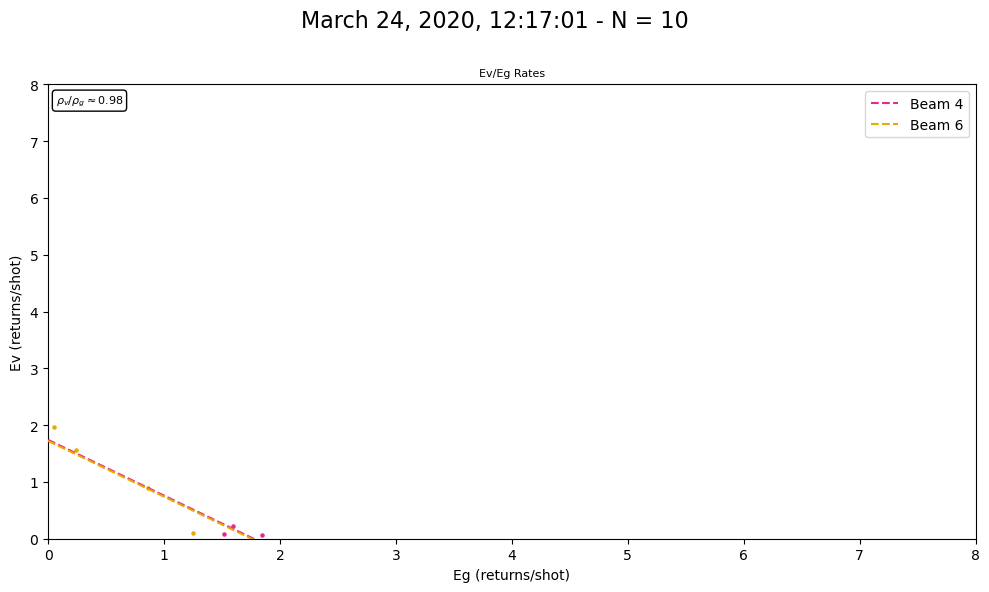

Nothing in rebinned section for sodankyla_full file 11's beam 1.
Nothing in rebinned section for sodankyla_full file 11's beam 2.


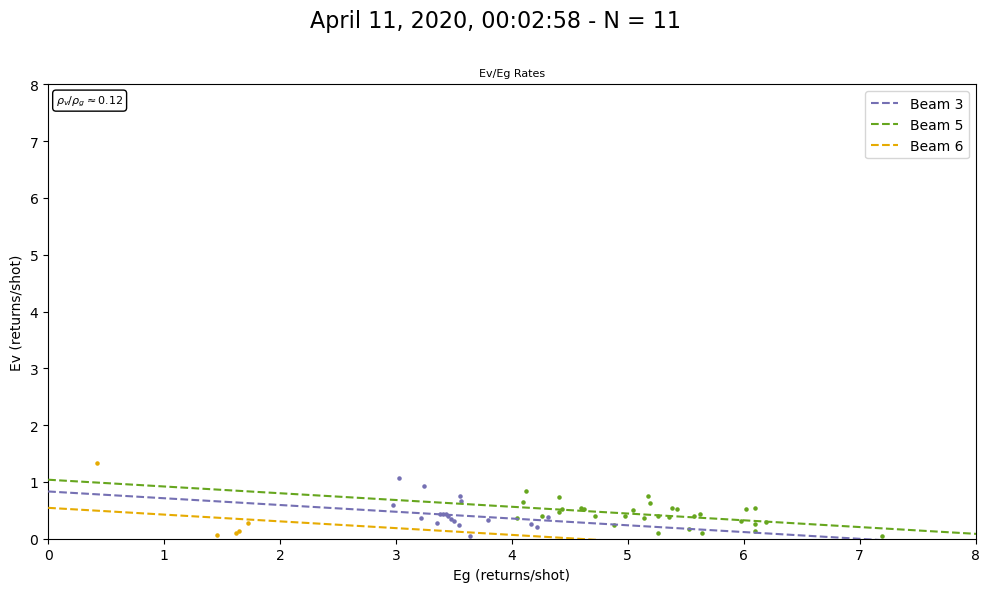

Nothing in rebinned section for sodankyla_full file 12's beam 5.
Nothing in rebinned section for sodankyla_full file 12's beam 6.


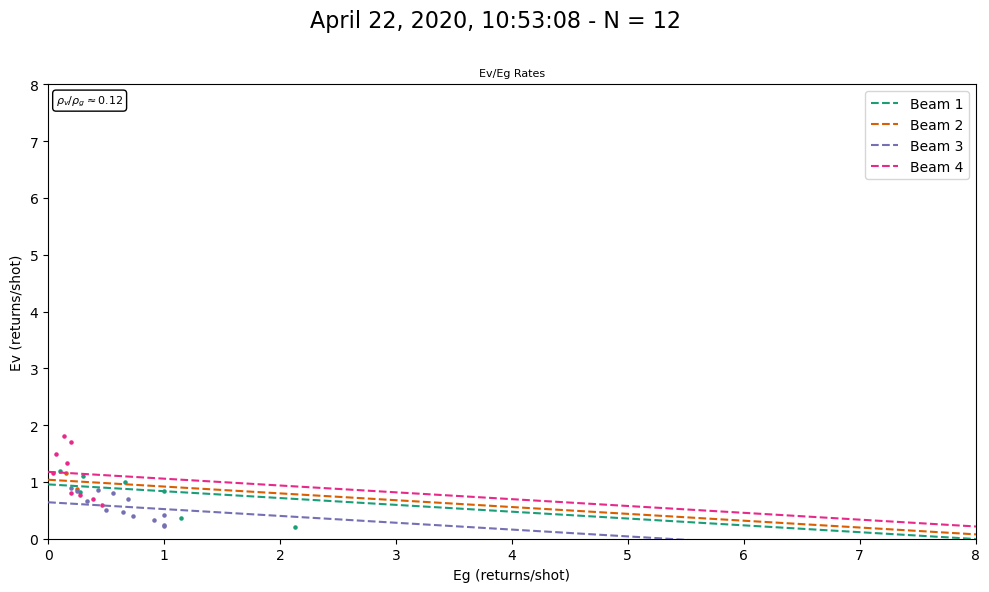

Nothing in rebinned section for sodankyla_full file 13's beam 1.
Nothing in rebinned section for sodankyla_full file 13's beam 2.
Nothing in rebinned section for sodankyla_full file 13's beam 3.
Nothing in rebinned section for sodankyla_full file 13's beam 4.


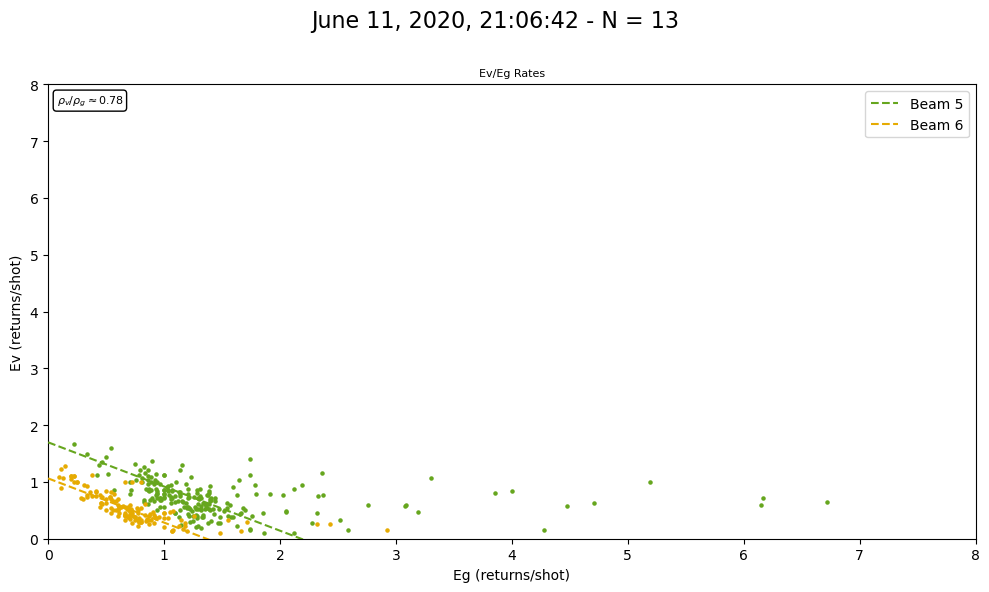

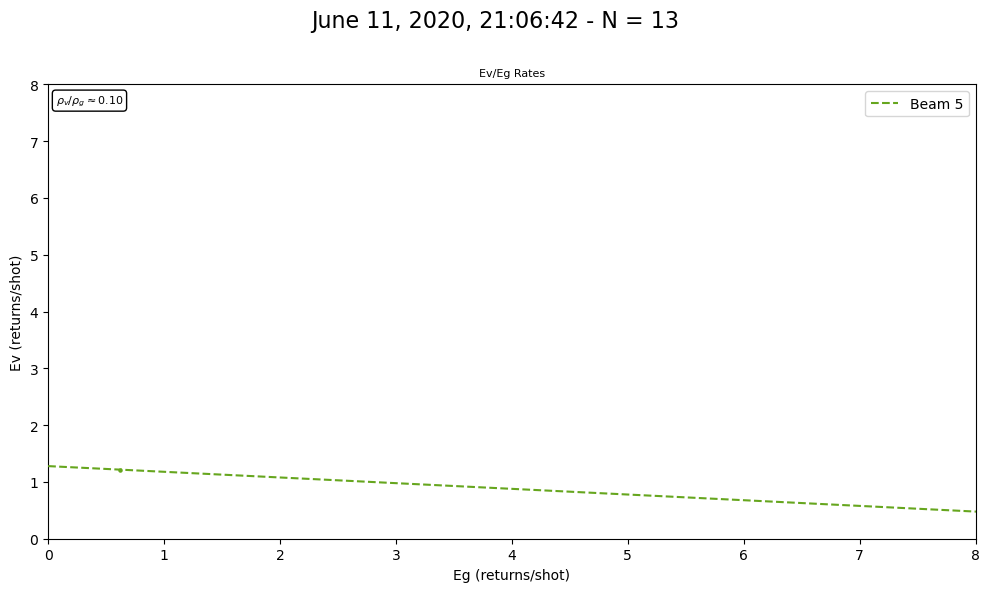

Nothing in rebinned section for sodankyla_full file 14's beam 1.
Nothing in rebinned section for sodankyla_full file 14's beam 2.
Nothing in rebinned section for sodankyla_full file 14's beam 3.
Nothing in rebinned section for sodankyla_full file 14's beam 4.
Nothing in rebinned section for sodankyla_full file 14's beam 5.
Nothing in rebinned section for sodankyla_full file 14's beam 6.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 15's beam 2.
Nothing in rebinned section for sodankyla_full file 15's beam 3.
Nothing in rebinned section for sodankyla_full file 15's beam 5.
Nothing in rebinned section for sodankyla_full file 15's beam 6.
Nothing in rebinned section for sodankyla_full file 16's beam 1.
Nothing in rebinned section for sodankyla_full file 16's beam 2.
Nothing in rebinned section for sodankyla_full file 16's beam 3.
Nothing in rebinned section for sodankyla_full file 16's beam 4.


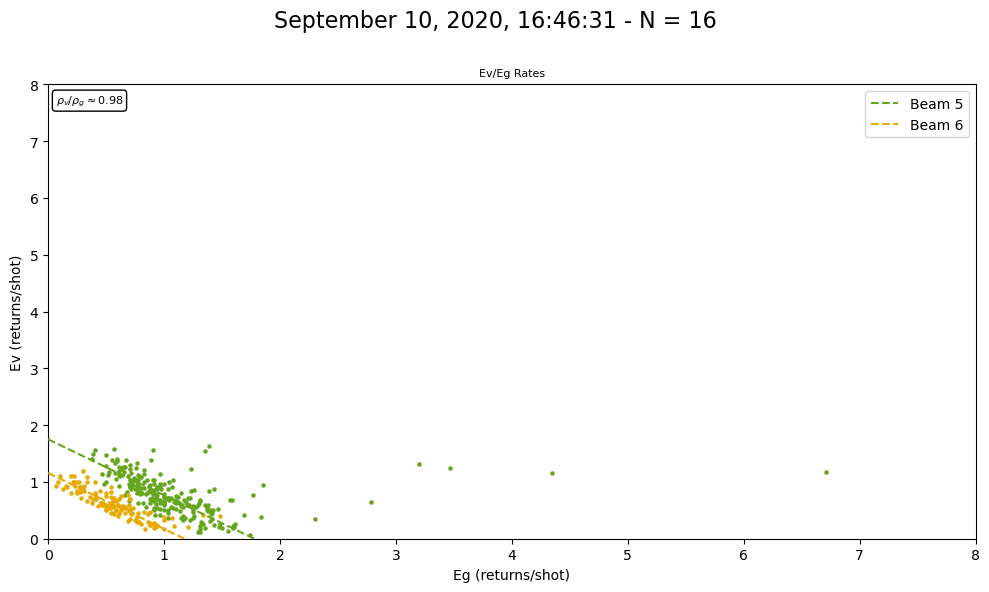

Nothing in rebinned section for sodankyla_full file 17's beam 1.
Nothing in rebinned section for sodankyla_full file 17's beam 2.


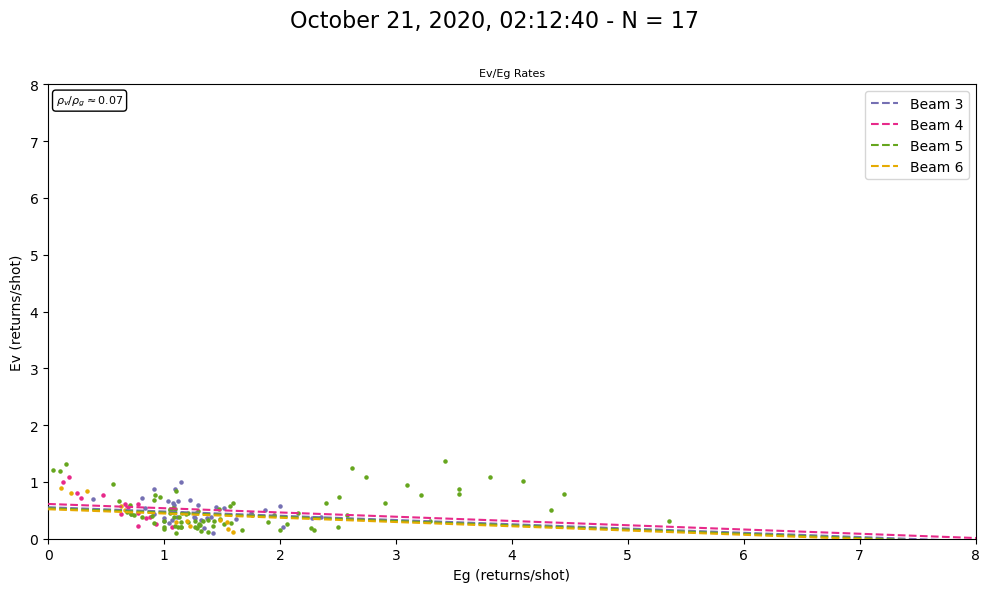

Nothing in rebinned section for sodankyla_full file 18's beam 1.
Nothing in rebinned section for sodankyla_full file 18's beam 2.
Nothing in rebinned section for sodankyla_full file 18's beam 3.
Nothing in rebinned section for sodankyla_full file 18's beam 4.
Nothing in rebinned section for sodankyla_full file 18's beam 5.
Nothing in rebinned section for sodankyla_full file 18's beam 6.


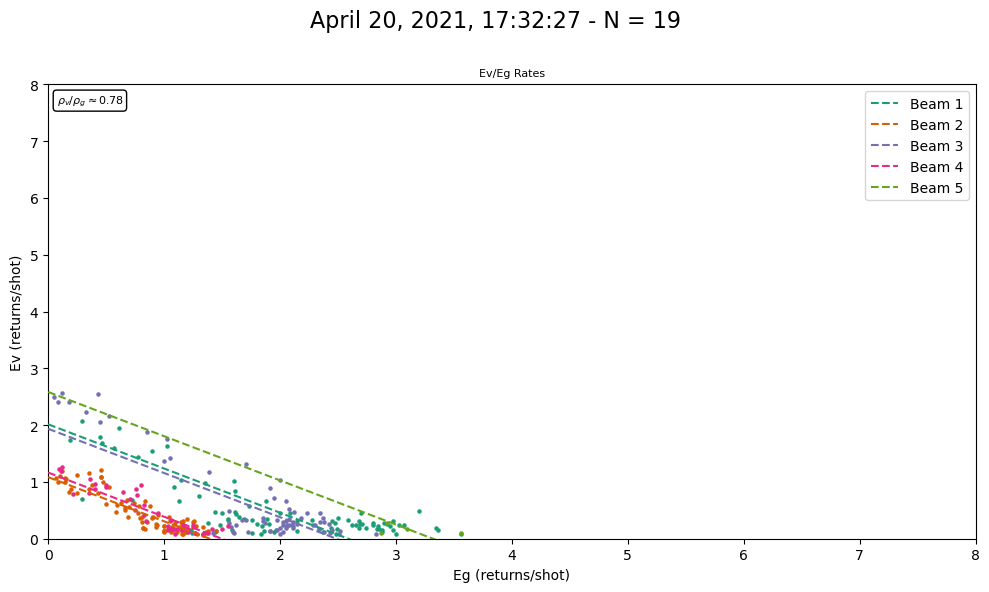

Nothing in rebinned section for sodankyla_full file 20's beam 3.
Nothing in rebinned section for sodankyla_full file 20's beam 4.
Nothing in rebinned section for sodankyla_full file 20's beam 5.
Nothing in rebinned section for sodankyla_full file 20's beam 6.


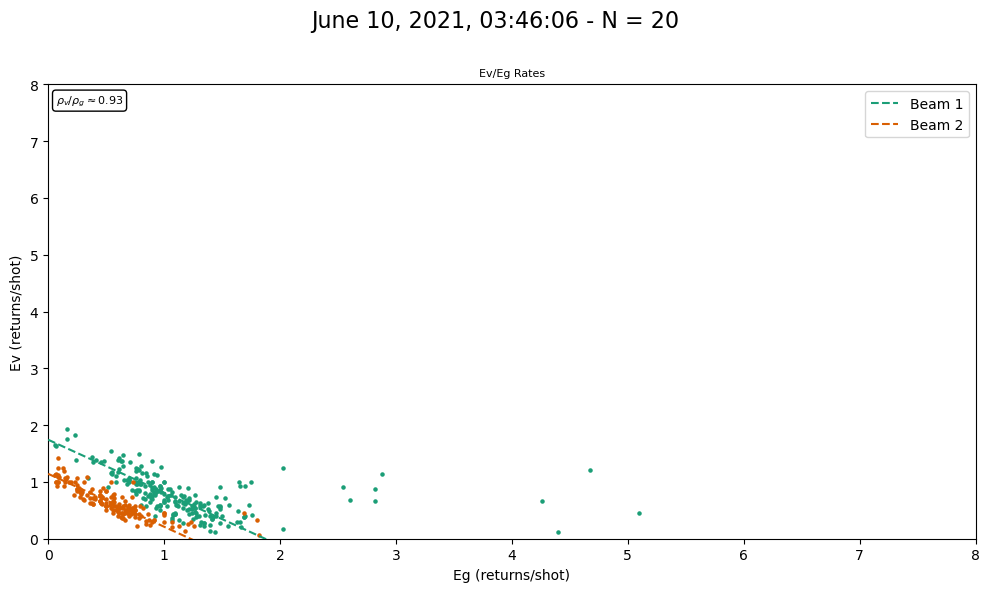

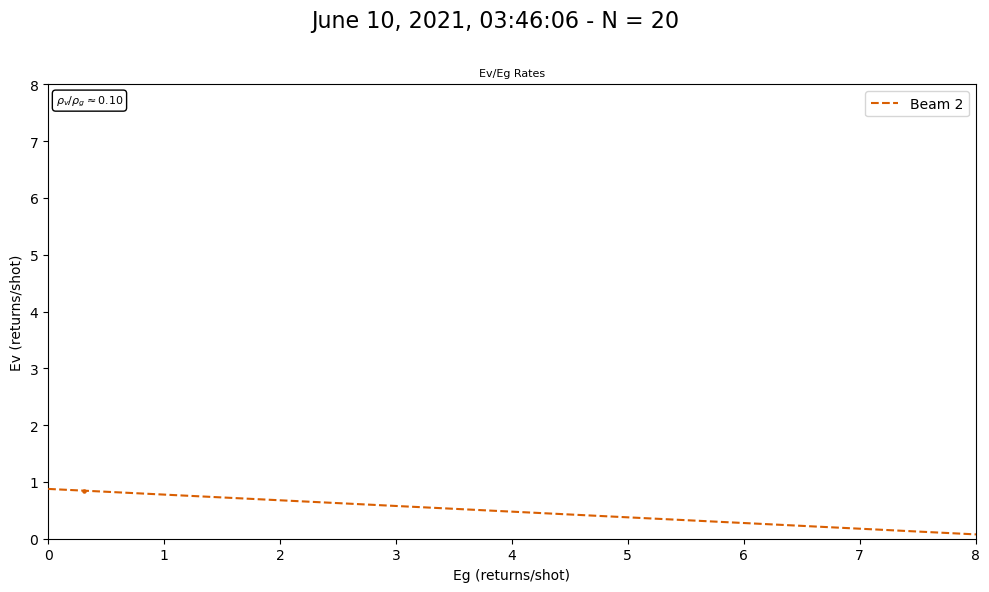

Nothing in rebinned section for sodankyla_full file 21's beam 1.
Nothing in rebinned section for sodankyla_full file 21's beam 2.


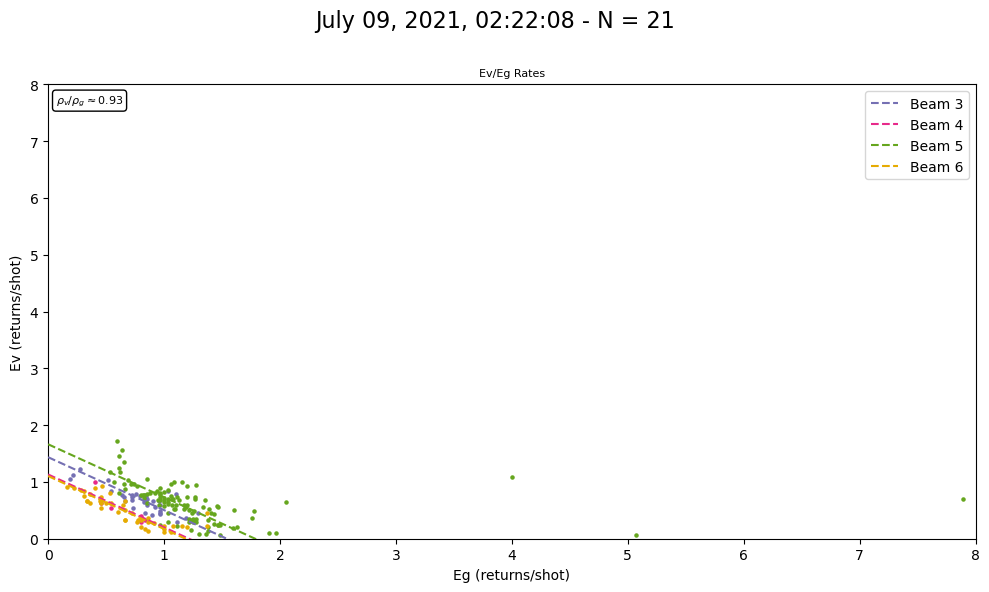

Nothing in rebinned section for sodankyla_full file 22's beam 3.
Nothing in rebinned section for sodankyla_full file 22's beam 4.
Nothing in rebinned section for sodankyla_full file 22's beam 5.
Nothing in rebinned section for sodankyla_full file 22's beam 6.


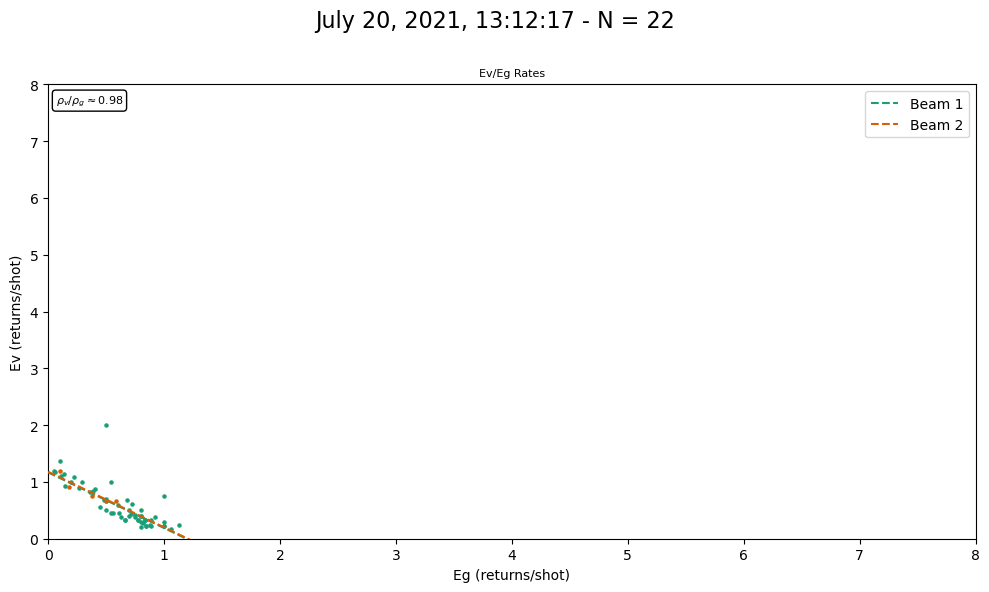

Nothing in rebinned section for sodankyla_full file 23's beam 3.
Nothing in rebinned section for sodankyla_full file 23's beam 4.
Nothing in rebinned section for sodankyla_full file 23's beam 5.
Nothing in rebinned section for sodankyla_full file 23's beam 6.


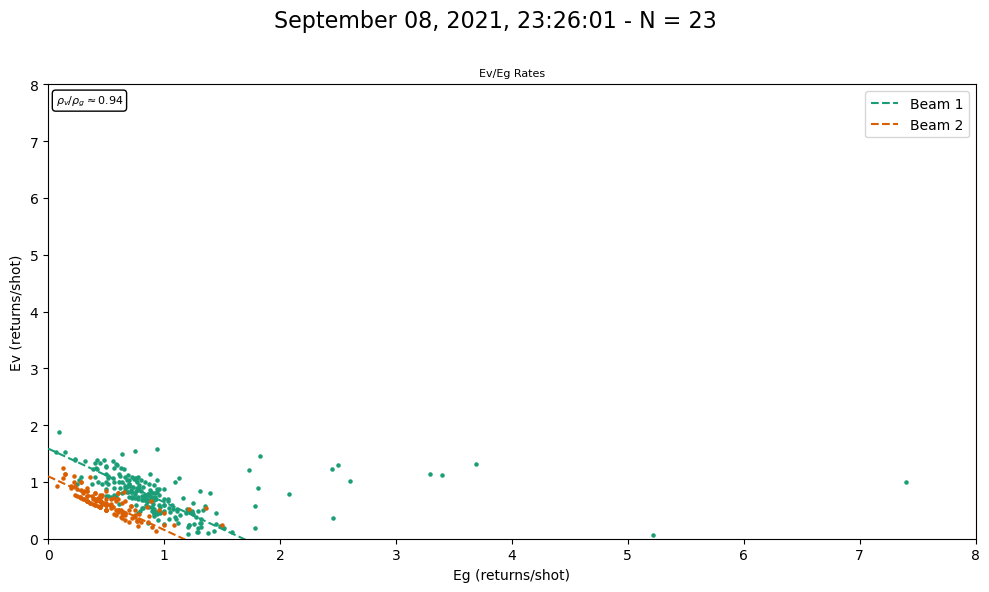

Nothing in rebinned section for sodankyla_full file 24's beam 1.
Nothing in rebinned section for sodankyla_full file 24's beam 2.
Nothing in rebinned section for sodankyla_full file 24's beam 3.
Nothing in rebinned section for sodankyla_full file 24's beam 4.


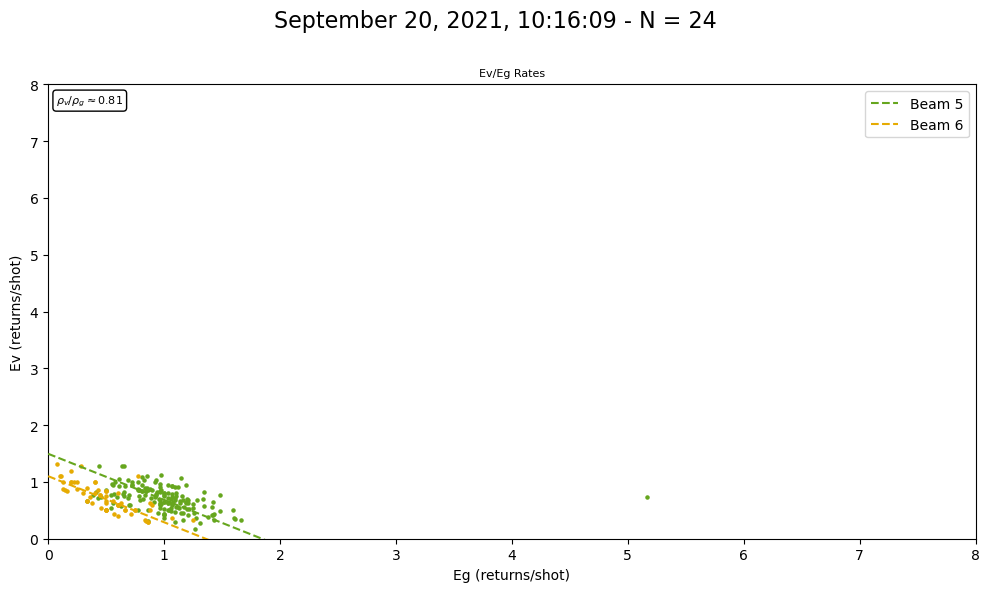

Nothing in rebinned section for sodankyla_full file 25's beam 3.
Nothing in rebinned section for sodankyla_full file 25's beam 4.
Nothing in rebinned section for sodankyla_full file 25's beam 5.
Nothing in rebinned section for sodankyla_full file 25's beam 6.


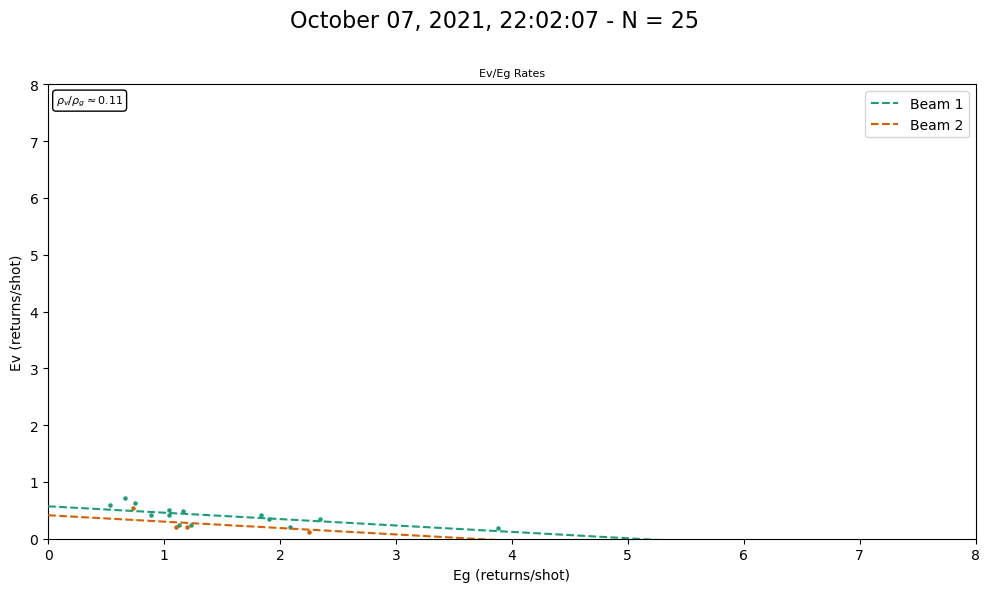

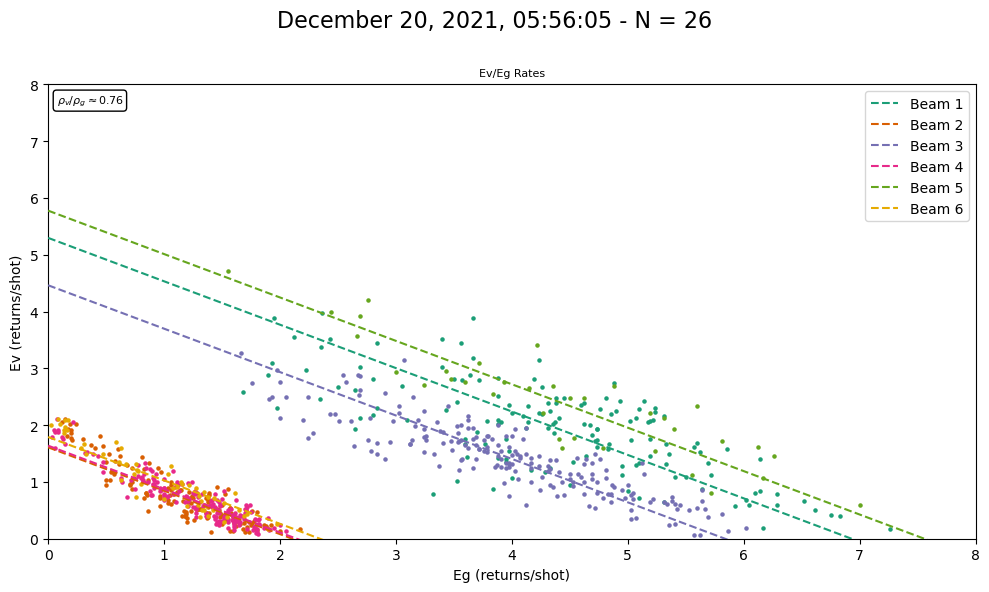

Nothing in rebinned section for sodankyla_full file 27's beam 1.
Nothing in rebinned section for sodankyla_full file 27's beam 2.
Nothing in rebinned section for sodankyla_full file 27's beam 3.
Nothing in rebinned section for sodankyla_full file 27's beam 4.


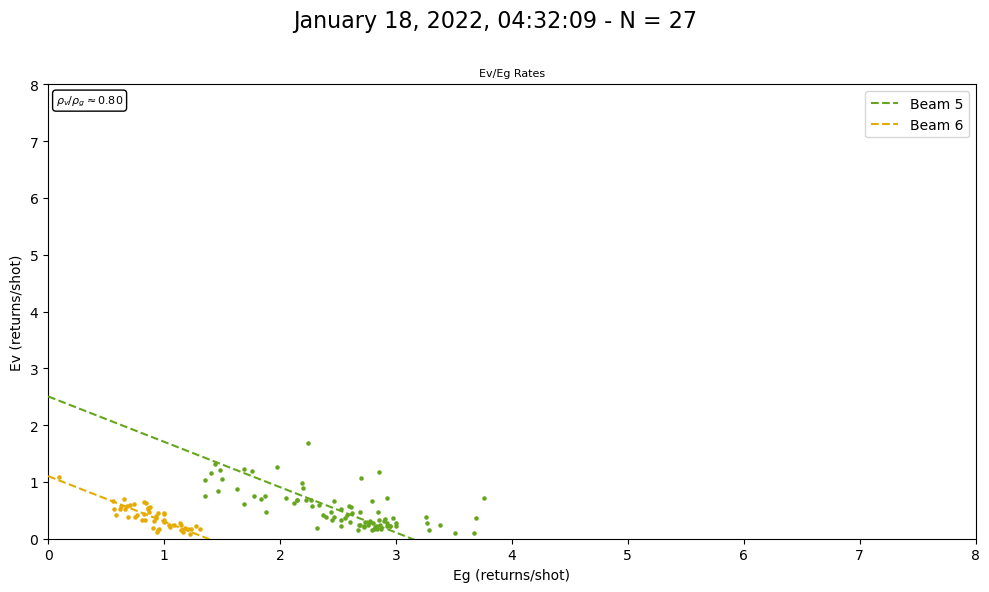

Nothing in rebinned section for sodankyla_full file 28's beam 1.
Nothing in rebinned section for sodankyla_full file 28's beam 2.
Nothing in rebinned section for sodankyla_full file 28's beam 3.
Nothing in rebinned section for sodankyla_full file 28's beam 4.


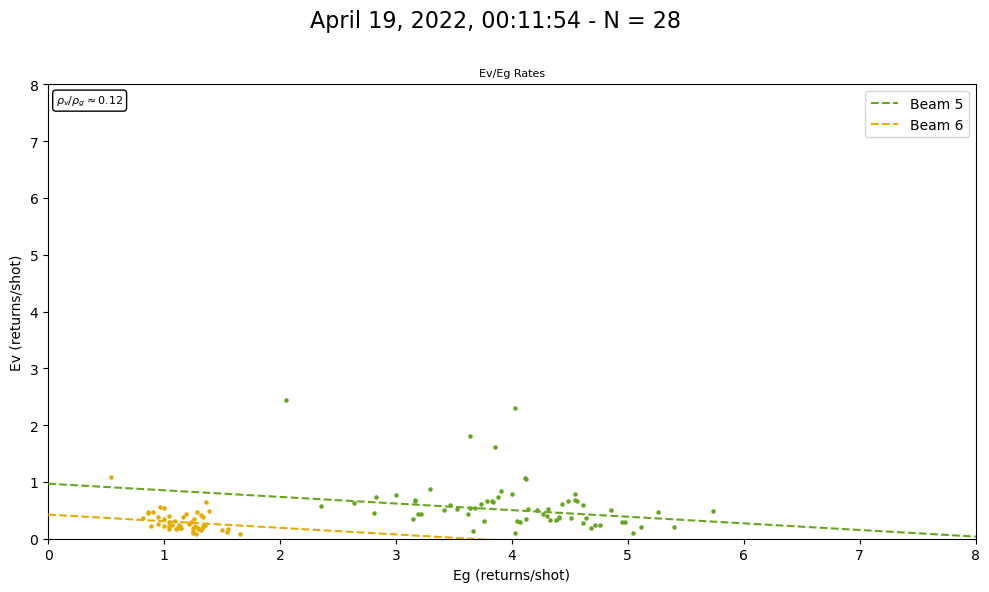

Nothing in rebinned section for sodankyla_full file 29's beam 1.
Nothing in rebinned section for sodankyla_full file 29's beam 2.


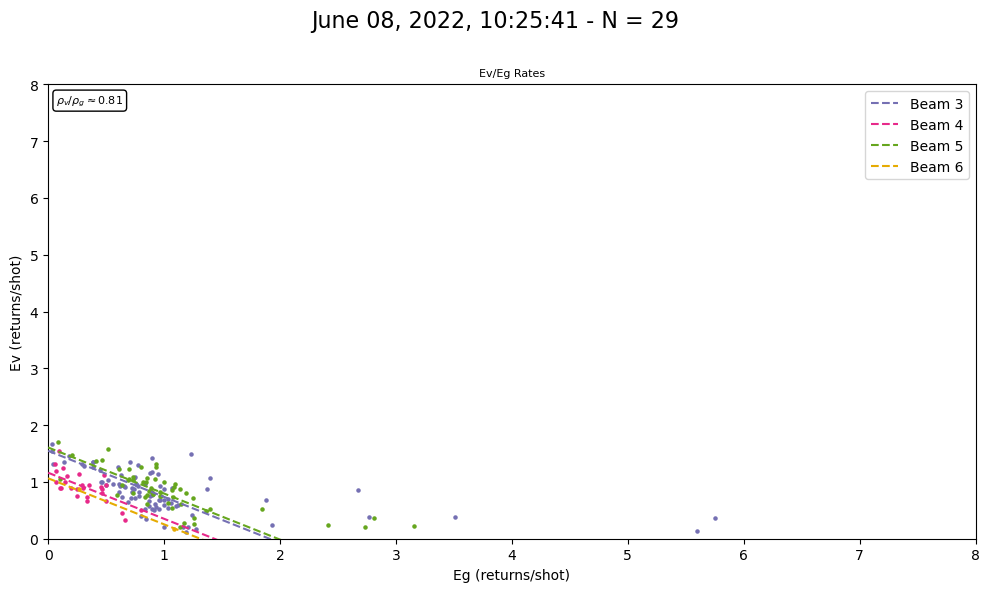

Nothing in rebinned section for sodankyla_full file 30's beam 1.
Nothing in rebinned section for sodankyla_full file 30's beam 2.
Nothing in rebinned section for sodankyla_full file 30's beam 3.
Nothing in rebinned section for sodankyla_full file 30's beam 4.


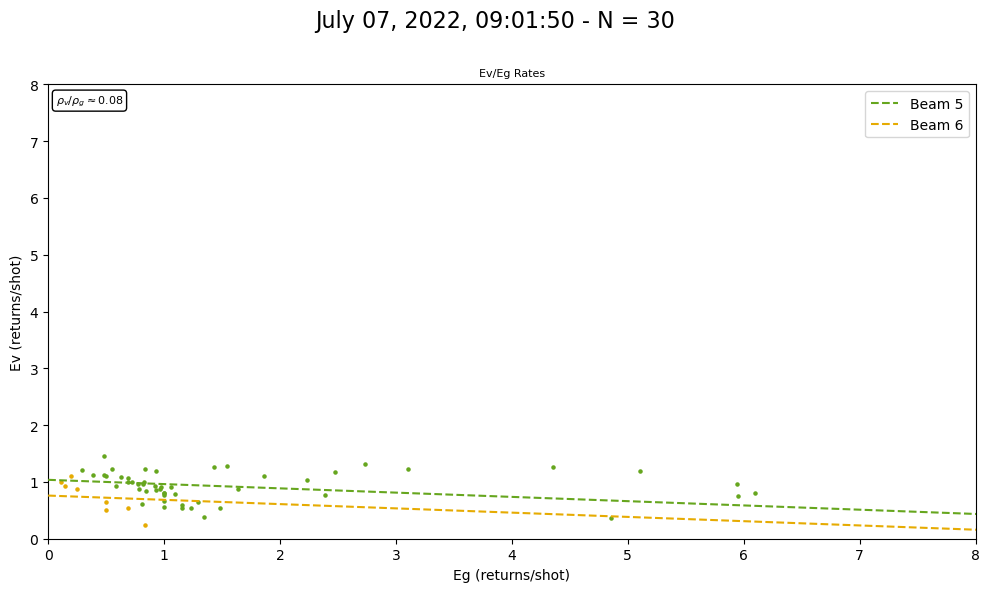

Nothing in rebinned section for sodankyla_full file 31's beam 3.
Nothing in rebinned section for sodankyla_full file 31's beam 4.
Nothing in rebinned section for sodankyla_full file 31's beam 5.
Nothing in rebinned section for sodankyla_full file 31's beam 6.


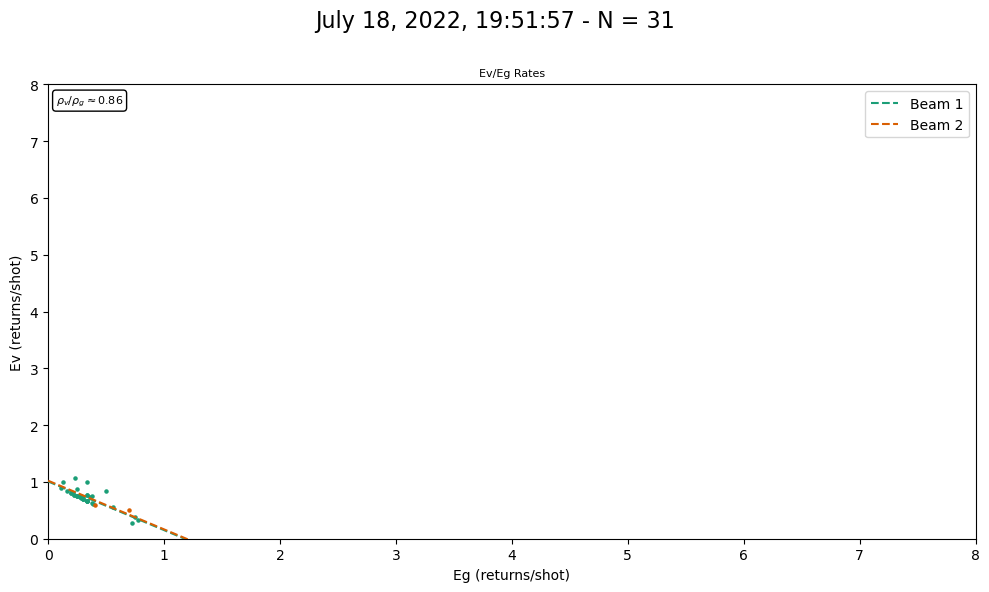

Nothing in rebinned section for sodankyla_full file 32's beam 3.
Nothing in rebinned section for sodankyla_full file 32's beam 4.
Nothing in rebinned section for sodankyla_full file 32's beam 5.
Nothing in rebinned section for sodankyla_full file 32's beam 6.
Nothing in rebinned section for sodankyla_full file 33's beam 1.
Nothing in rebinned section for sodankyla_full file 33's beam 2.
Nothing in rebinned section for sodankyla_full file 33's beam 3.
Nothing in rebinned section for sodankyla_full file 33's beam 4.


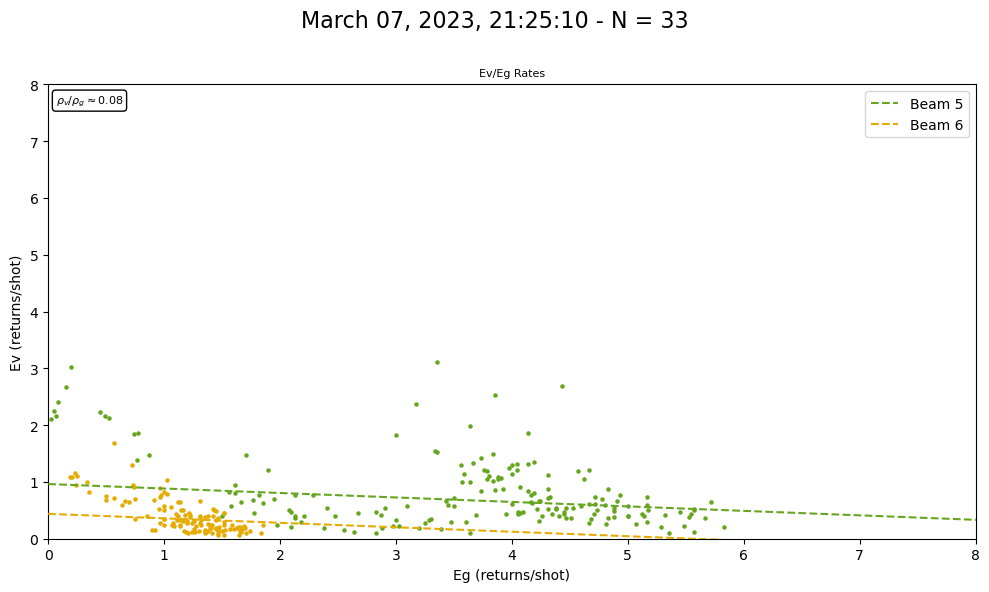

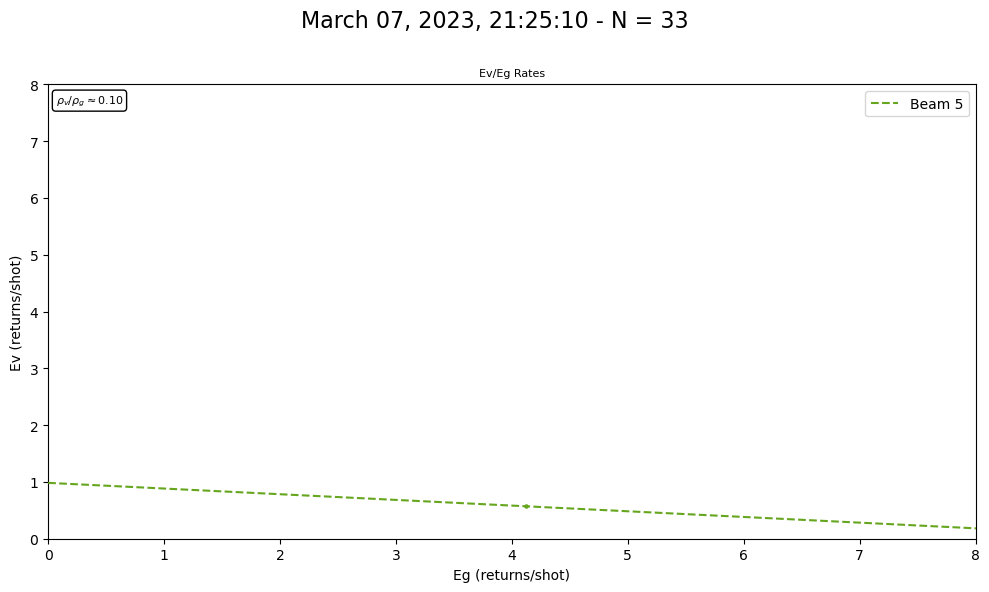

Nothing in rebinned section for sodankyla_full file 34's beam 3.
Nothing in rebinned section for sodankyla_full file 34's beam 4.
Nothing in rebinned section for sodankyla_full file 34's beam 5.
Nothing in rebinned section for sodankyla_full file 34's beam 6.


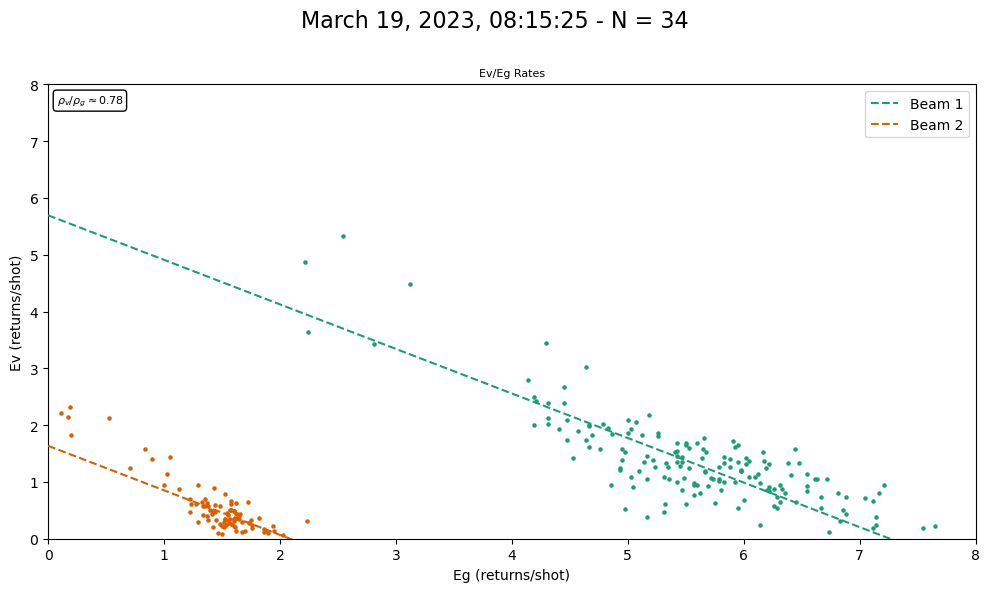

Nothing in rebinned section for sodankyla_full file 35's beam 3.
Nothing in rebinned section for sodankyla_full file 35's beam 4.
Nothing in rebinned section for sodankyla_full file 35's beam 5.
Nothing in rebinned section for sodankyla_full file 35's beam 6.


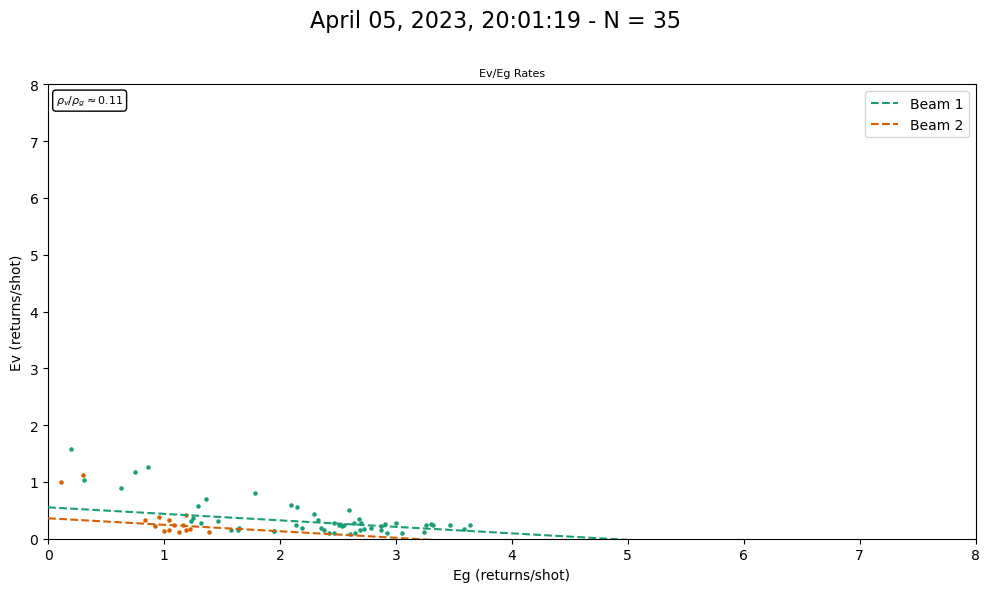

Nothing in rebinned section for sodankyla_full file 36's beam 1.
Nothing in rebinned section for sodankyla_full file 36's beam 2.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 36's beam 4.
Nothing in rebinned section for sodankyla_full file 36's beam 5.
Nothing in rebinned section for sodankyla_full file 36's beam 6.
Nothing in rebinned section for sodankyla_full file 37's beam 1.
Nothing in rebinned section for sodankyla_full file 37's beam 2.
Nothing in rebinned section for sodankyla_full file 37's beam 3.
Nothing in rebinned section for sodankyla_full file 37's beam 4.
Nothing in rebinned section for sodankyla_full file 37's beam 5.
Nothing in rebinned section for sodankyla_full file 37's beam 6.
Nothing in rebinned section for sodankyla_full file 38's beam 1.
Nothing in rebinned section for sodankyla_full file 38's beam 2.
Nothing in rebinned section for sodankyla_full file 38's beam 5.
Nothing in rebinned section for sodankyla_full file 38's beam 6.


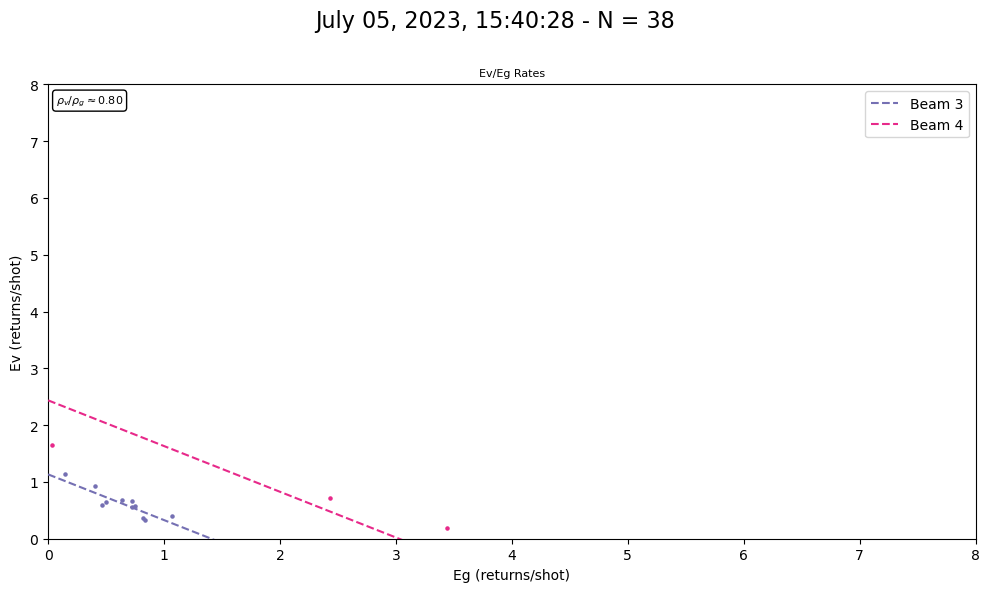

Nothing in rebinned section for sodankyla_full file 39's beam 1.
Nothing in rebinned section for sodankyla_full file 39's beam 2.
Nothing in rebinned section for sodankyla_full file 39's beam 3.
Nothing in rebinned section for sodankyla_full file 39's beam 4.


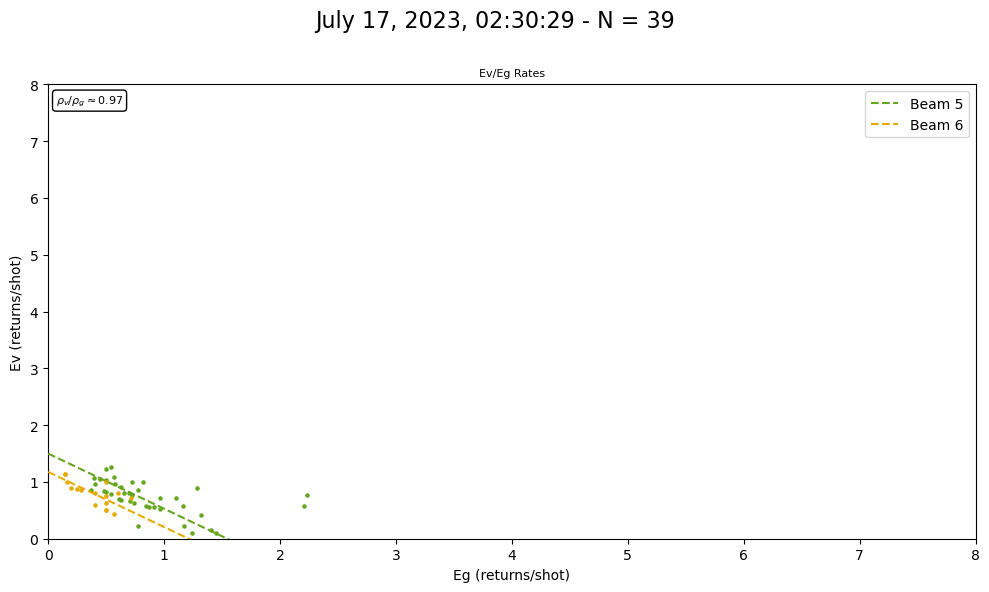

Nothing in rebinned section for sodankyla_full file 40's beam 1.
Nothing in rebinned section for sodankyla_full file 40's beam 2.
Nothing in rebinned section for sodankyla_full file 40's beam 3.
Nothing in rebinned section for sodankyla_full file 40's beam 4.
Nothing in rebinned section for sodankyla_full file 40's beam 5.
Nothing in rebinned section for sodankyla_full file 40's beam 6.
Nothing in rebinned section for sodankyla_full file 41's beam 1.
Nothing in rebinned section for sodankyla_full file 41's beam 2.
Nothing in rebinned section for sodankyla_full file 41's beam 3.
Nothing in rebinned section for sodankyla_full file 41's beam 4.
Nothing in rebinned section for sodankyla_full file 41's beam 5.
Nothing in rebinned section for sodankyla_full file 41's beam 6.
Nothing in rebinned section for sodankyla_full file 42's beam 1.
Nothing in rebinned section for sodankyla_full file 42's beam 2.


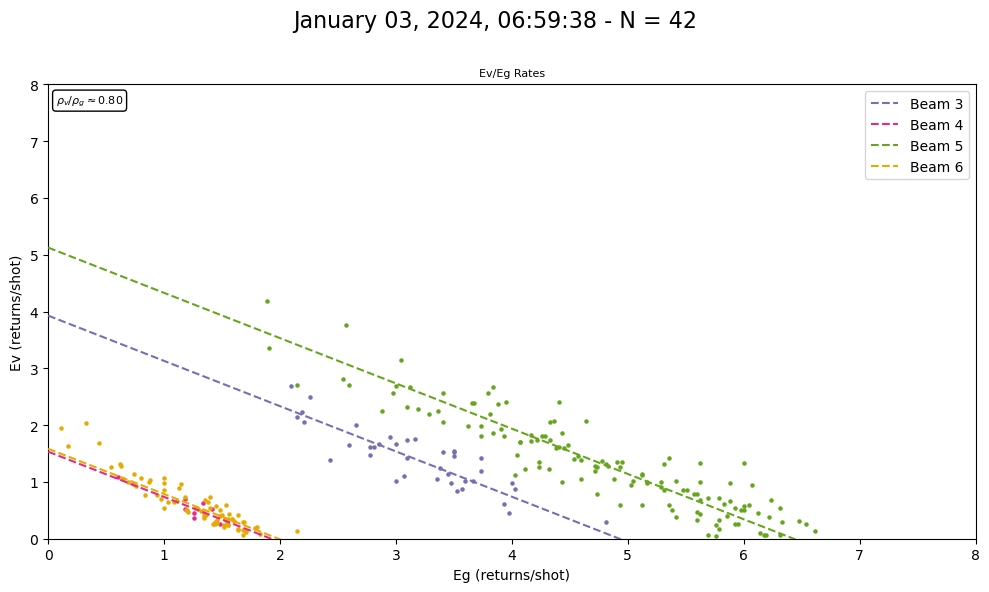

Nothing in rebinned section for sodankyla_full file 43's beam 3.
Nothing in rebinned section for sodankyla_full file 43's beam 4.
Nothing in rebinned section for sodankyla_full file 43's beam 5.
Nothing in rebinned section for sodankyla_full file 43's beam 6.


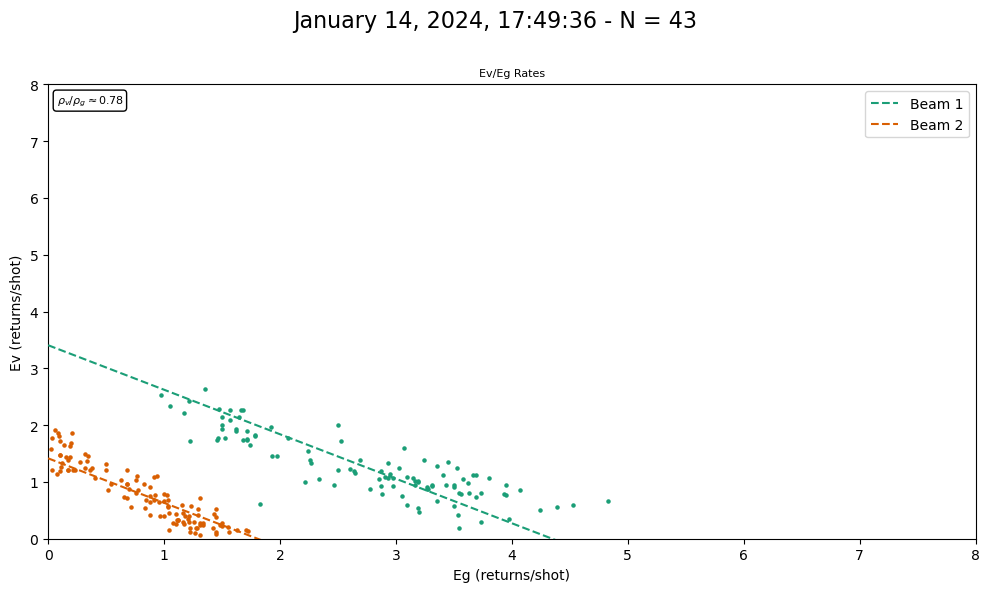

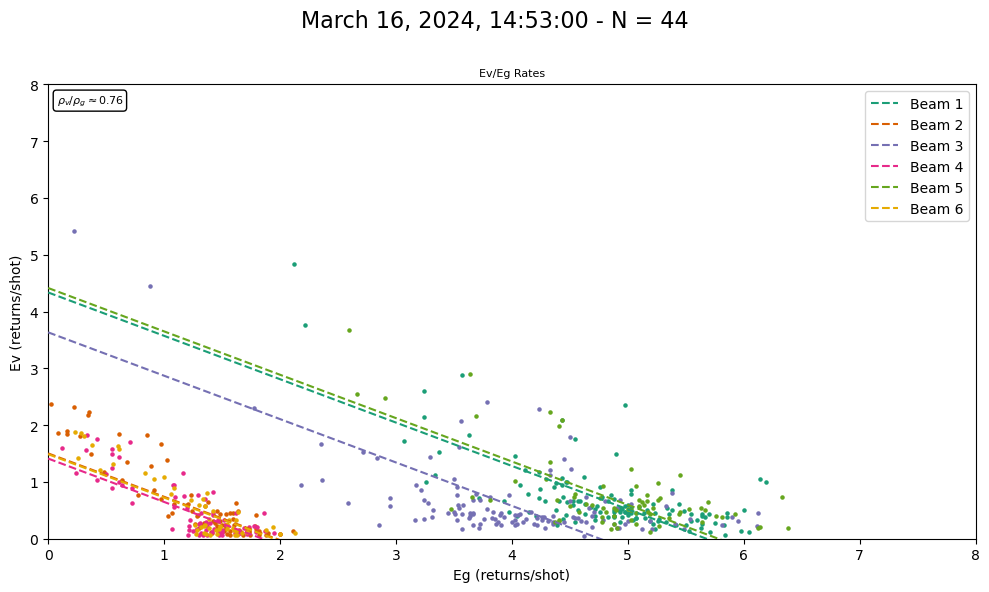

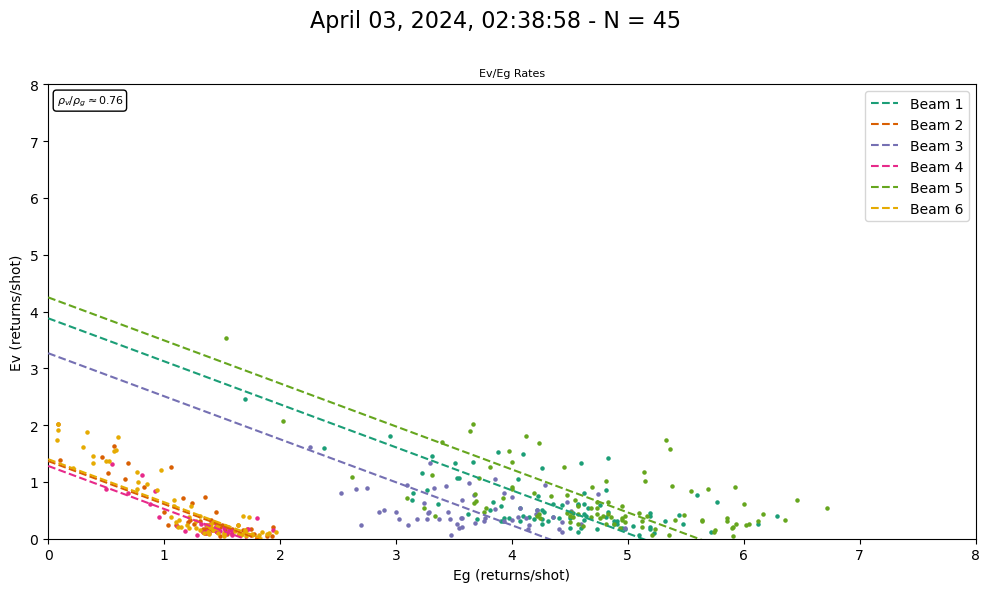

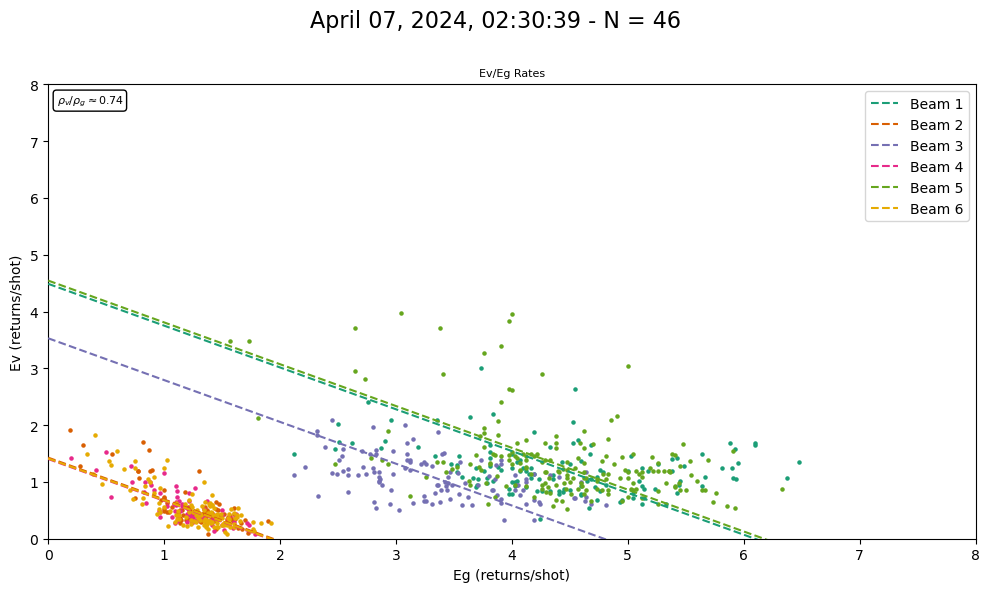

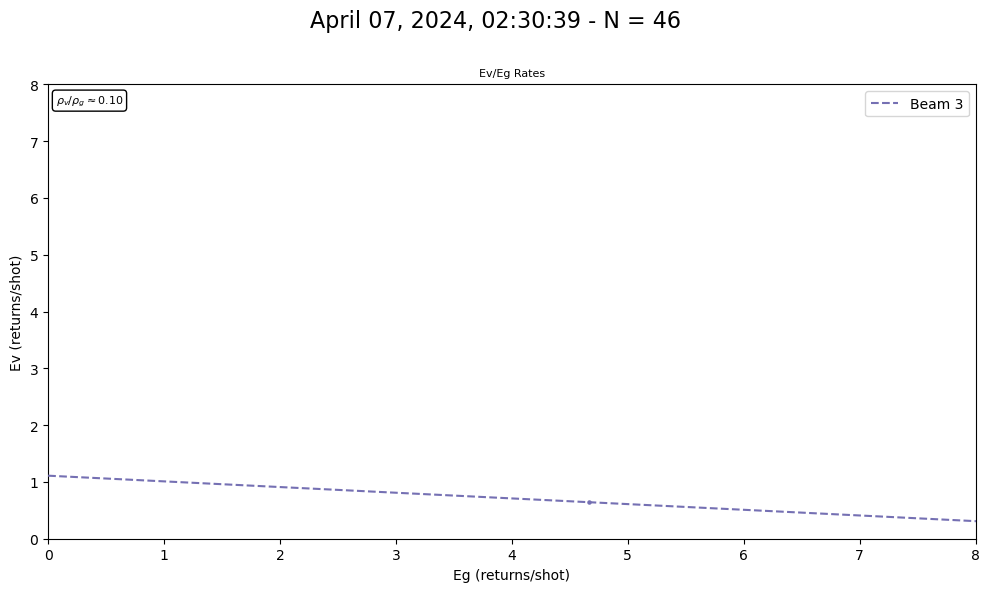

Nothing in rebinned section for sodankyla_full file 47's beam 3.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 47's beam 5.
Nothing in rebinned section for sodankyla_full file 47's beam 6.
Nothing in rebinned section for sodankyla_full file 48's beam 1.
Nothing in rebinned section for sodankyla_full file 48's beam 2.


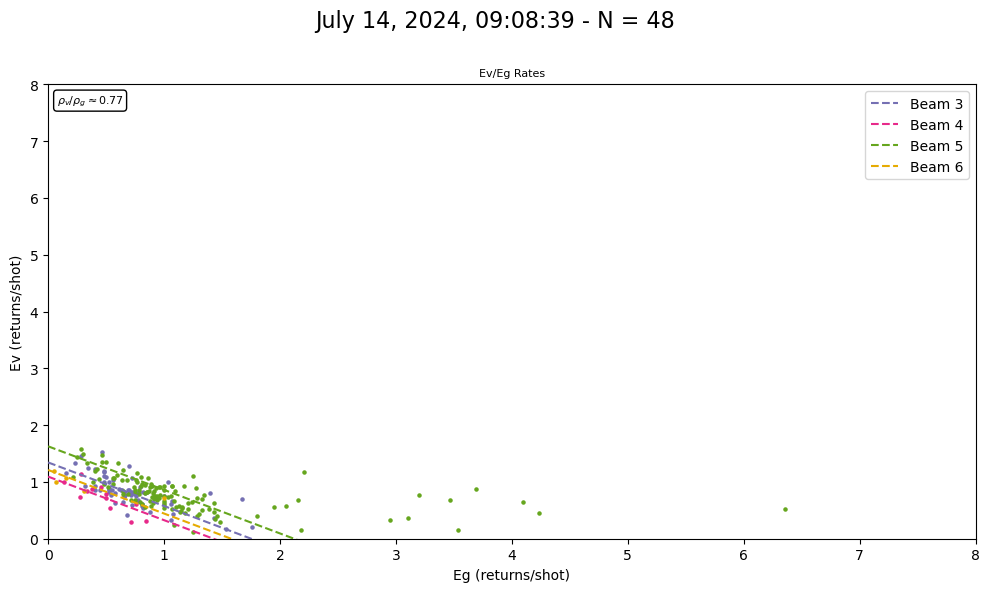

In [1]:
from scripts.parallel_blocks import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/sodankyla_full/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (26.634154, 67.361833)

for i in range(N):
# for i in [1]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=185, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=185, threshold=1, small_box=8, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=185, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

Nothing in rebinned section for sodankyla_full file 13's beam 1.
Nothing in rebinned section for sodankyla_full file 13's beam 2.
Nothing in rebinned section for sodankyla_full file 13's beam 3.
Nothing in rebinned section for sodankyla_full file 13's beam 4.


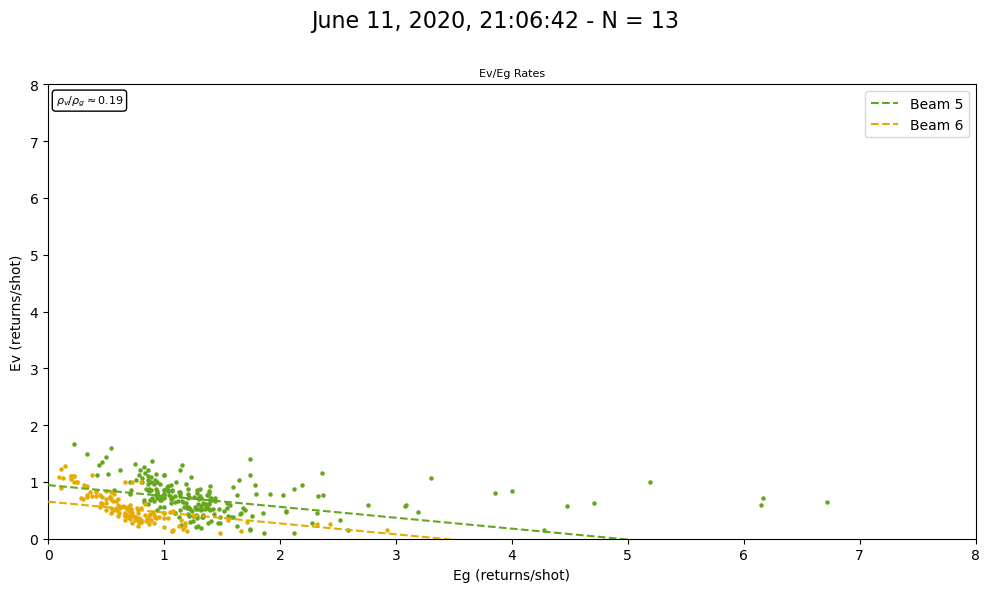

Nothing in rebinned section for sodankyla_full file 25's beam 3.
Nothing in rebinned section for sodankyla_full file 25's beam 4.
Nothing in rebinned section for sodankyla_full file 25's beam 5.
Nothing in rebinned section for sodankyla_full file 25's beam 6.


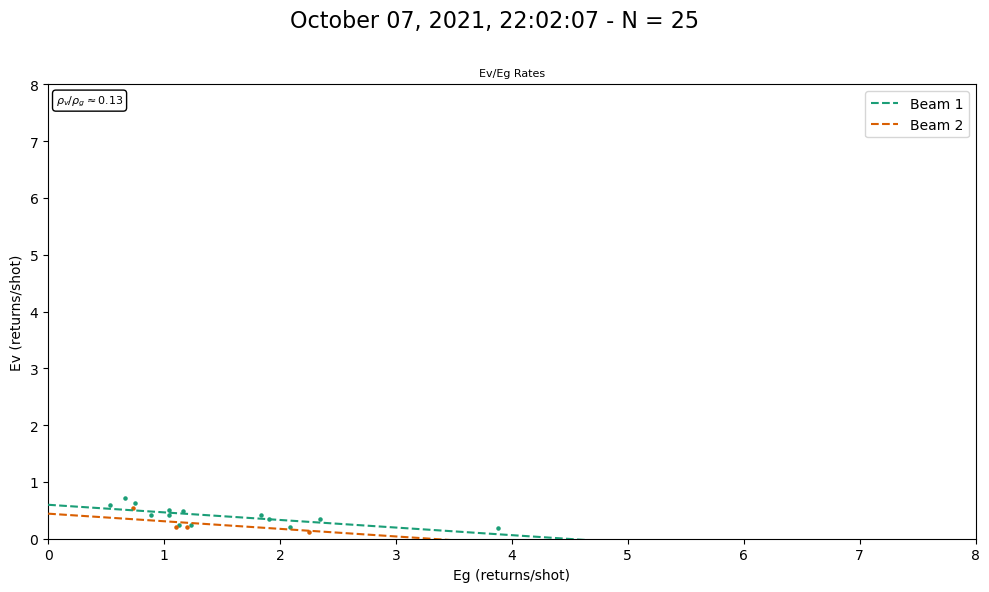

Nothing in rebinned section for sodankyla_full file 30's beam 1.
Nothing in rebinned section for sodankyla_full file 30's beam 2.
Nothing in rebinned section for sodankyla_full file 30's beam 3.
Nothing in rebinned section for sodankyla_full file 30's beam 4.


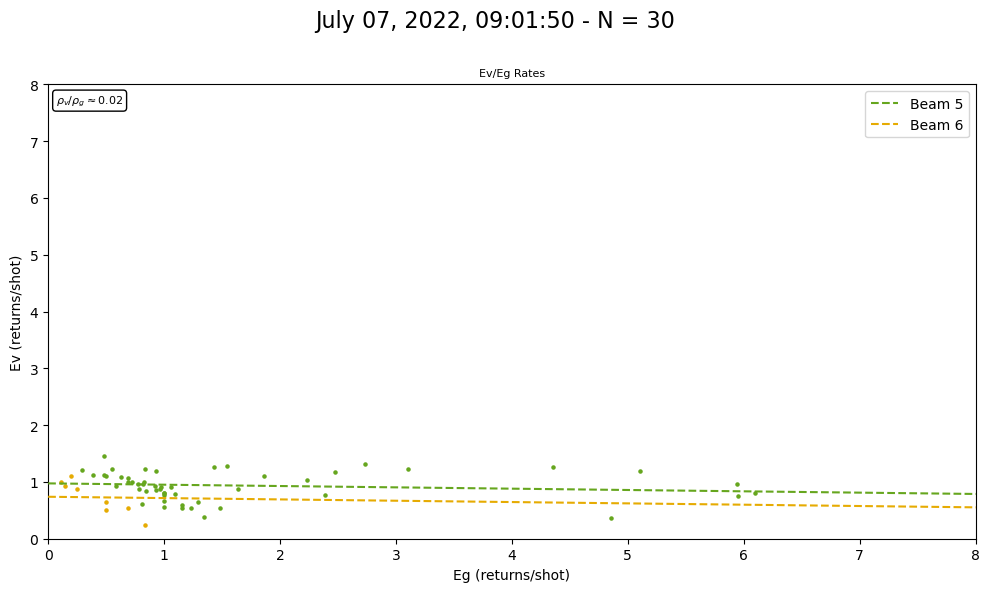

Nothing in rebinned section for sodankyla_full file 48's beam 1.
Nothing in rebinned section for sodankyla_full file 48's beam 2.


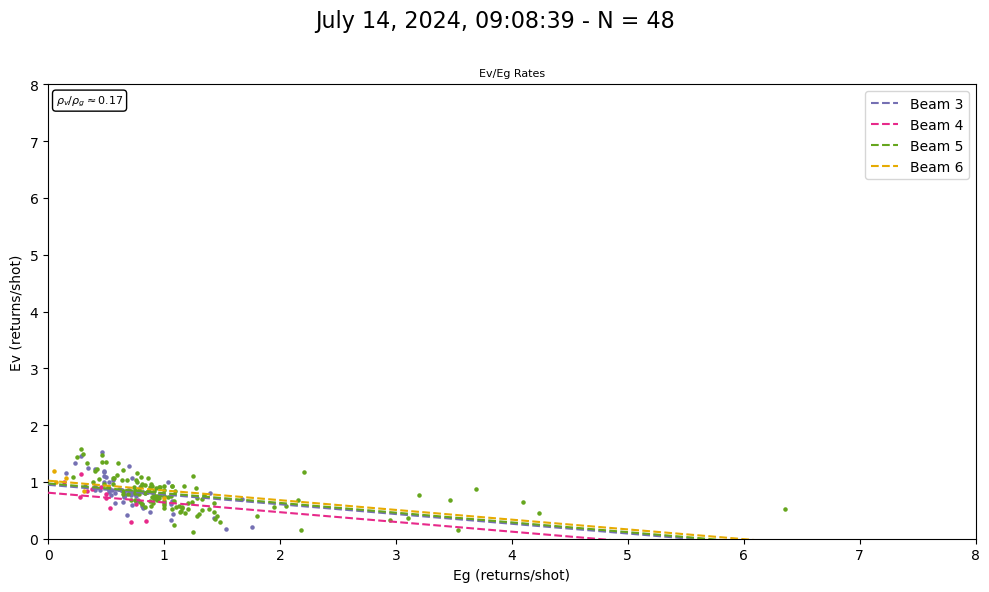

In [4]:
from scripts.parallel_blocks import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/sodankyla_full/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (26.634154, 67.361833)

# for i in range(N):
for i in [13,25,30,48]:
# for i in [0,3,4,7,8,11,19,27,28,33,35,44,45,46]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=185, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=185, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=185, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Delta Junction

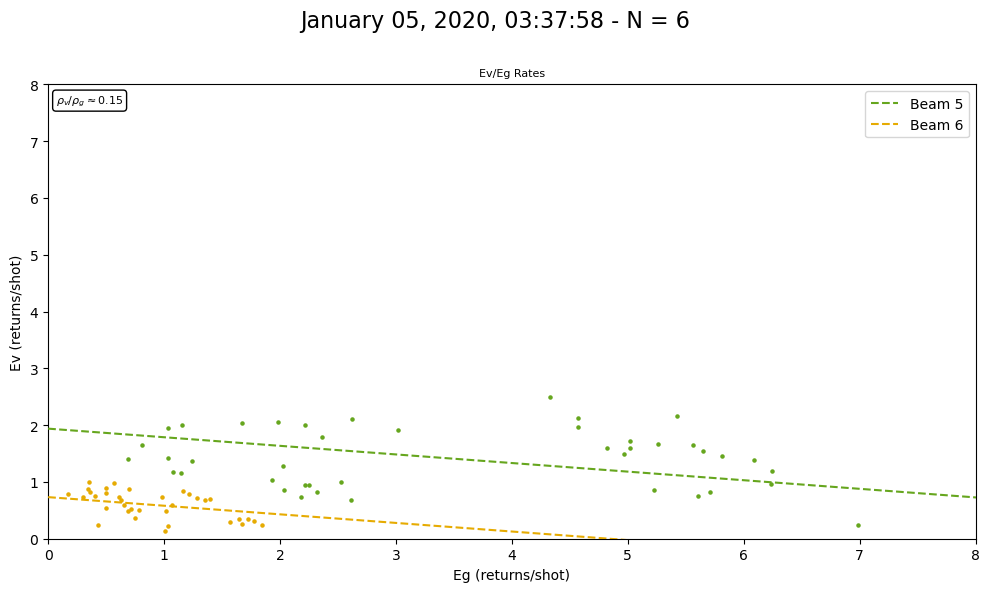

Nothing in rebinned section for delta_junction file 6's beam 1.
Nothing in rebinned section for delta_junction file 6's beam 2.
Nothing in rebinned section for delta_junction file 6's beam 3.
Nothing in rebinned section for delta_junction file 6's beam 4.


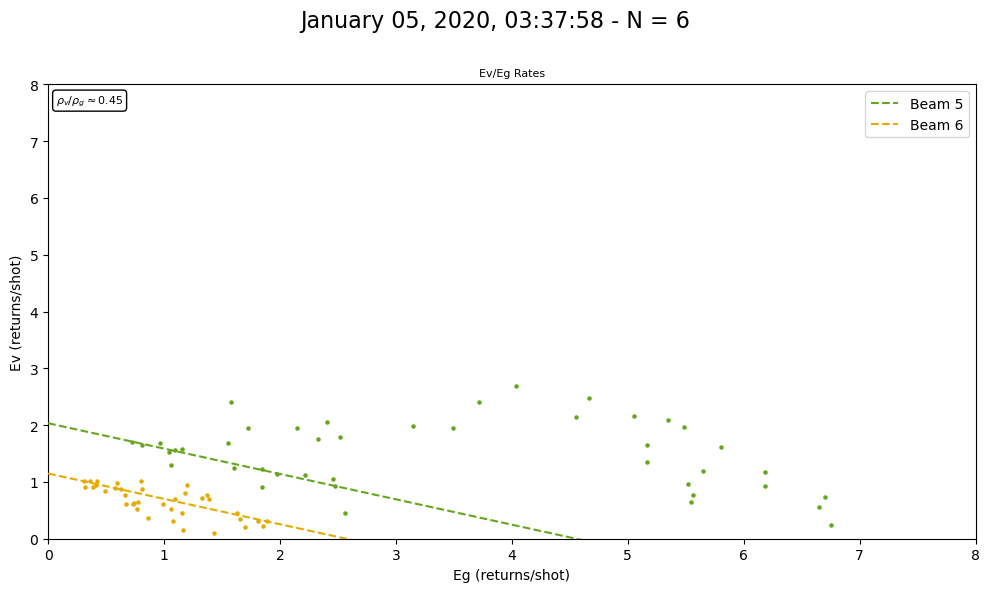

In [1]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/delta_junction/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-145.7514, 63.8811)

# for i in range(10):
for i in [6]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, graph_detail=1)

    # BLOCKS
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, small_box=8, graph_detail=1, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=504, threshold=1, small_box=8, graph_detail=1, loss='linear', rebinned=0, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=504, threshold=1, small_box=8, graph_detail=1, loss='arctan', rebinned=100, f_scale=.05,
                         outlier_removal=3)

# Marcell MN

subset_can_flag
surf_type
subset_te_flag
The first part...
0.020444869995117188
The big compute...
1.6992506980895996
The unpacking...
0.0007898807525634766
The trad canopy cover...
0.0015611648559570312
The sub_bin_canopy_metrics...
0.022443056106567383
Slope calc...
0.5135302543640137
Vertical Height Bins...
3.617321491241455
Photons above threshold...
0.22791528701782227
The last part...
0.0008764266967773438
subset_can_flag
surf_type
subset_te_flag
The first part...
0.01955866813659668
The big compute...
1.267057180404663
The unpacking...
0.0008482933044433594
The trad canopy cover...
0.0015840530395507812
The sub_bin_canopy_metrics...
0.02064824104309082
Slope calc...
0.2941300868988037
Vertical Height Bins...
2.017961025238037
Photons above threshold...
0.1247398853302002
The last part...
0.0006430149078369141
subset_can_flag
surf_type
subset_te_flag
The first part...
0.02072596549987793
The big compute...
1.9141757488250732
The unpacking...
0.0007815361022949219
The trad canopy 

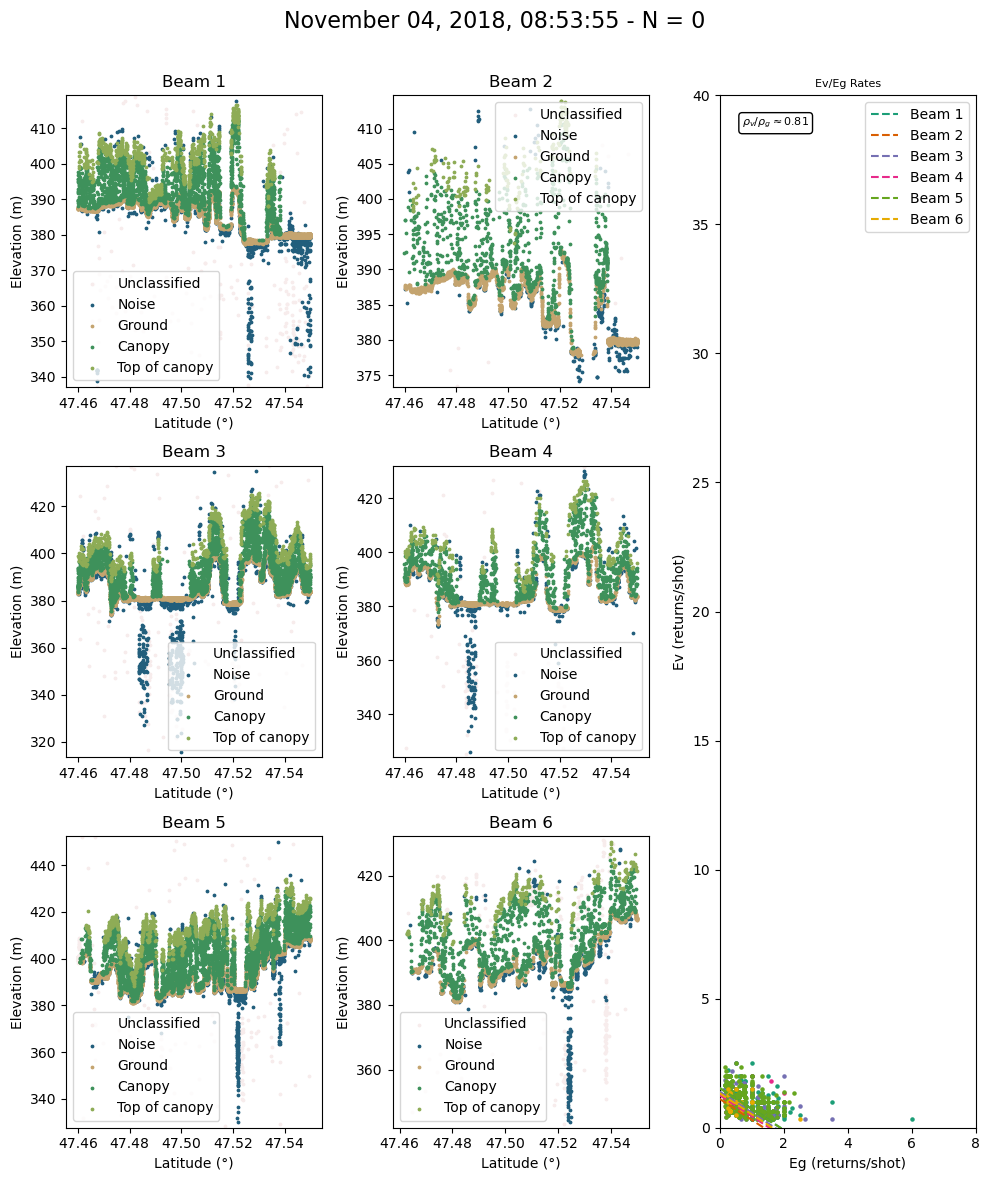

Nothing in rebinned section for marcell_MN file 1's beam 1.
Nothing in rebinned section for marcell_MN file 1's beam 2.
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020121097564697266
The big compute...
1.5285873413085938
The unpacking...
0.0008592605590820312
The trad canopy cover...
0.0015788078308105469
The sub_bin_canopy_metrics...
0.02171468734741211
Slope calc...
0.5220656394958496
Vertical Height Bins...
1.1765103340148926
Photons above threshold...
0.06358051300048828
The last part...
0.0007393360137939453
subset_can_flag
surf_type
subset_te_flag
The first part...
0.019791603088378906
The big compute...
1.2609844207763672
The unpacking...
0.0008375644683837891
The trad canopy cover...
0.0015878677368164062
The sub_bin_canopy_metrics...
0.021657466888427734
Slope calc...
0.2903122901916504
Vertical Height Bins...
2.8068642616271973
Photons above threshold...
0.1573328971862793
The last part...
0.0006198883056640625
subset_can_flag
surf_type
subset_te_flag
The fir

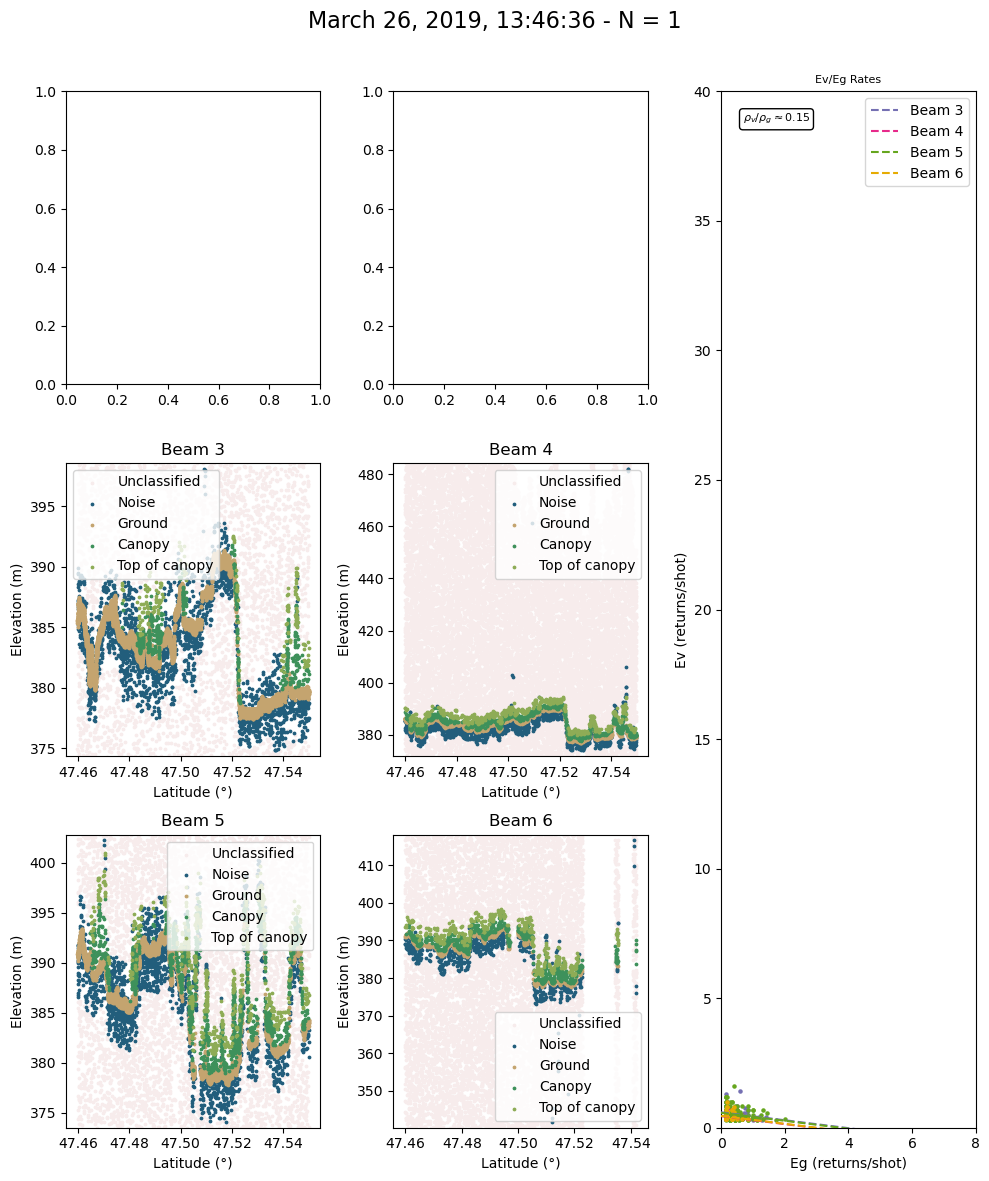

Nothing in rebinned section for marcell_MN file 2's beam 1.
Nothing in rebinned section for marcell_MN file 2's beam 2.
subset_can_flag
surf_type
subset_te_flag
The first part...
0.019800662994384766
The big compute...
0.8489775657653809
The unpacking...
0.0007836818695068359
The trad canopy cover...
0.0015921592712402344
The sub_bin_canopy_metrics...
0.014250516891479492
Slope calc...
0.11461091041564941
Vertical Height Bins...
2.858424663543701
Photons above threshold...
0.15863895416259766
The last part...
0.0005850791931152344
subset_can_flag
surf_type
subset_te_flag
The first part...
0.018137454986572266
The big compute...
0.5020232200622559
The unpacking...
0.0007655620574951172
The trad canopy cover...
0.0016050338745117188
The sub_bin_canopy_metrics...
0.011541128158569336
Slope calc...
0.04284024238586426
Vertical Height Bins...
1.9825937747955322
Photons above threshold...
0.12021899223327637
The last part...
0.0011436939239501953
subset_can_flag
surf_type
subset_te_flag
The 

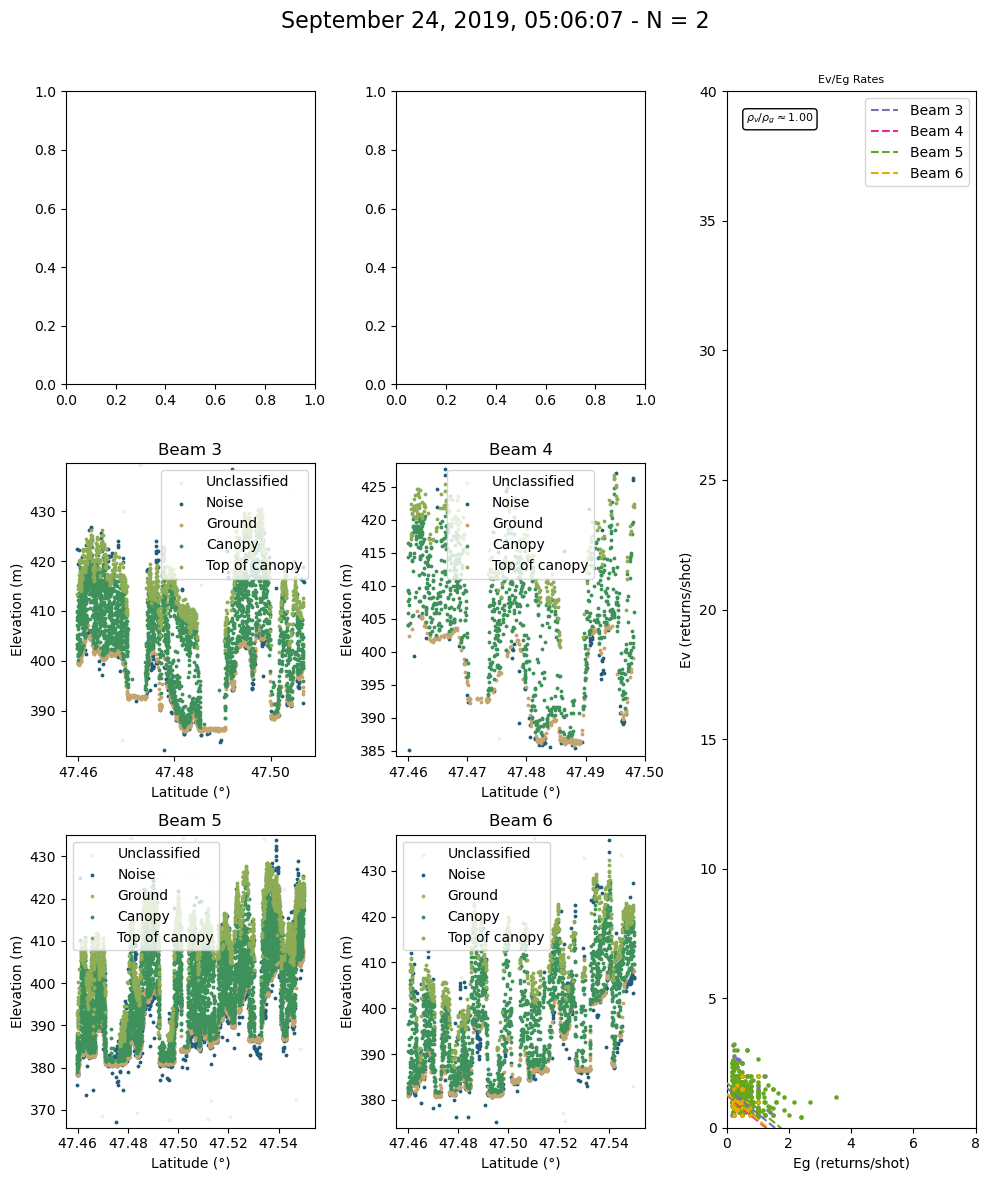

Nothing in rebinned section for marcell_MN file 3's beam 1.
Nothing in rebinned section for marcell_MN file 3's beam 2.
subset_can_flag
surf_type
subset_te_flag
The first part...
0.018488168716430664
The big compute...
0.6664354801177979
The unpacking...
0.0007863044738769531
The trad canopy cover...
0.0015850067138671875
The sub_bin_canopy_metrics...
0.012297630310058594
Slope calc...
0.17931890487670898
Vertical Height Bins...
1.279905080795288
Photons above threshold...
0.0736548900604248
The last part...
0.0007832050323486328
subset_can_flag
surf_type
subset_te_flag
The first part...
0.017373085021972656
The big compute...
0.3154618740081787
The unpacking...
0.0008237361907958984
The trad canopy cover...
0.0015866756439208984
The sub_bin_canopy_metrics...
0.010306835174560547
Slope calc...
0.05431628227233887
Vertical Height Bins...
0.6634547710418701
Photons above threshold...
0.040252685546875
The last part...
0.0005636215209960938
subset_can_flag
surf_type
subset_te_flag
The fir

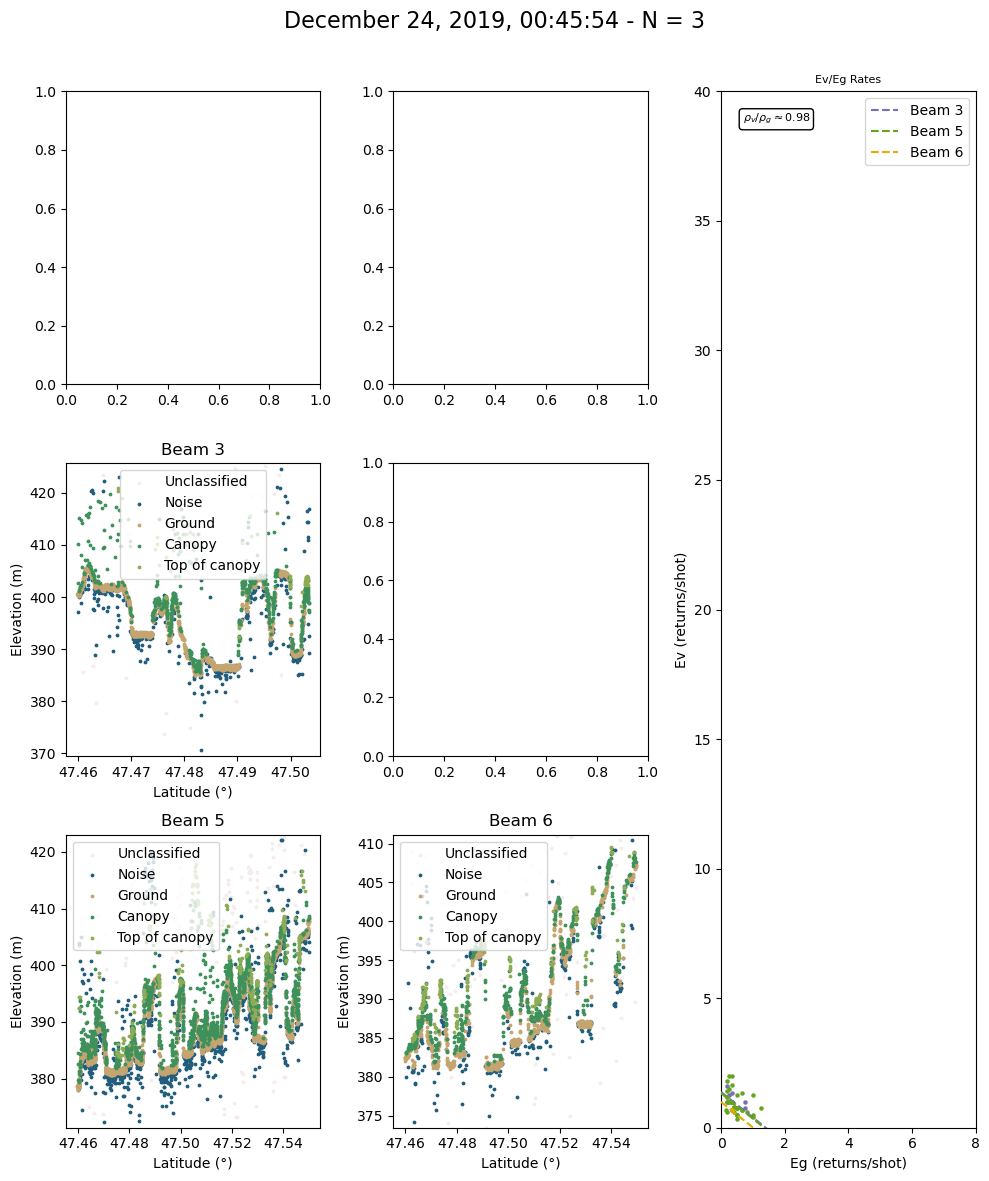

subset_can_flag
surf_type
subset_te_flag
The first part...
0.019965410232543945
The big compute...
1.0561976432800293
The unpacking...
0.0008525848388671875
The trad canopy cover...
0.001697540283203125
The sub_bin_canopy_metrics...
0.021645784378051758
Slope calc...
0.31197667121887207
Vertical Height Bins...
1.9742093086242676
Photons above threshold...
0.11740660667419434
The last part...
0.0006103515625
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020378828048706055
The big compute...
0.8258442878723145
The unpacking...
0.0008499622344970703
The trad canopy cover...
0.0016314983367919922
The sub_bin_canopy_metrics...
0.02059650421142578
Slope calc...
0.24544119834899902
Vertical Height Bins...
1.1524677276611328
Photons above threshold...
0.07125353813171387
The last part...
0.0006191730499267578
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020634889602661133
The big compute...
1.2265660762786865
The unpacking...
0.0007829666137695312
The trad canopy

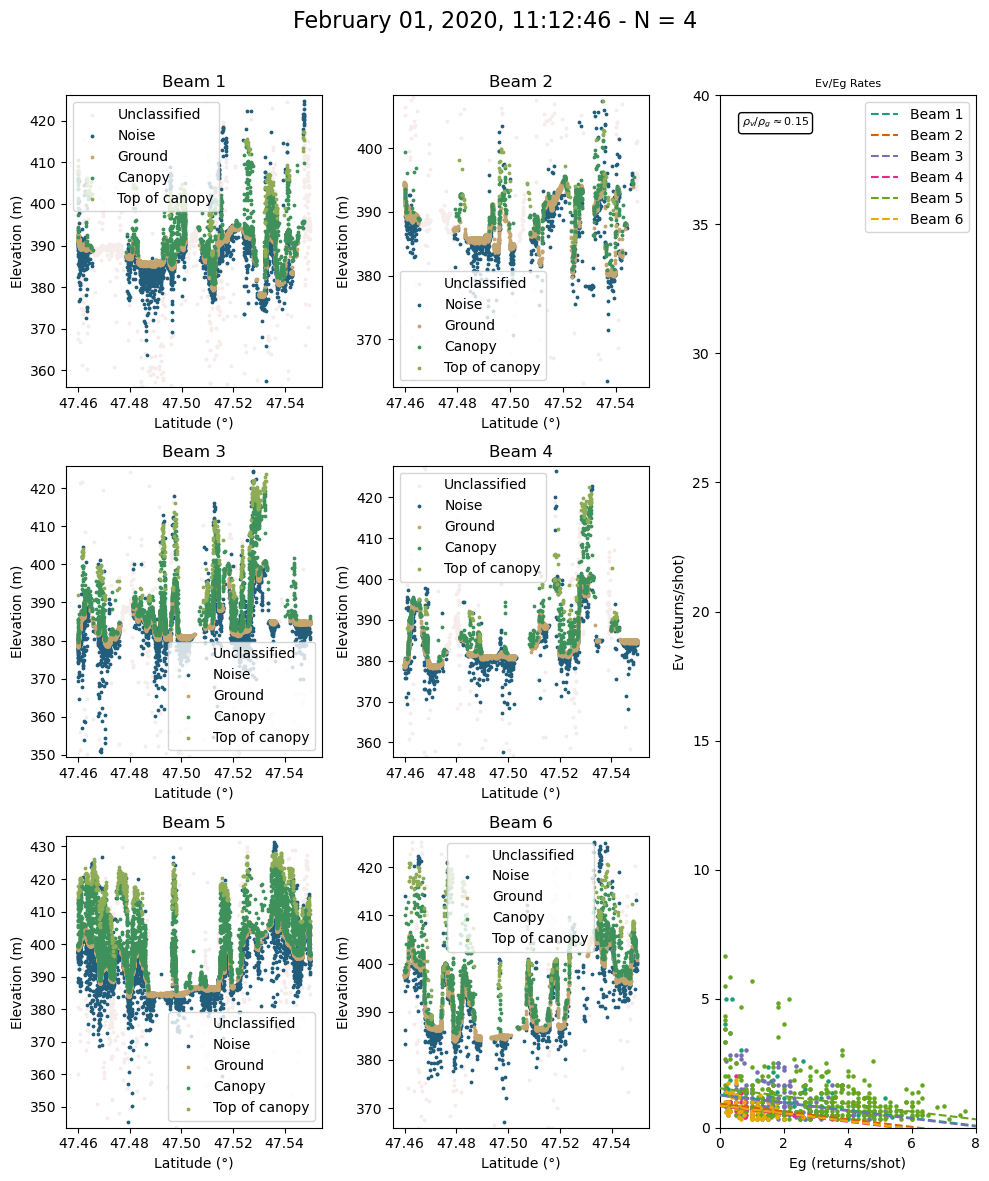

Nothing in rebinned section for marcell_MN file 5's beam 1.
Nothing in rebinned section for marcell_MN file 5's beam 2.
Nothing in rebinned section for marcell_MN file 5's beam 3.
Nothing in rebinned section for marcell_MN file 5's beam 4.
subset_can_flag
surf_type
subset_te_flag
The first part...
0.02015542984008789
The big compute...
0.41828393936157227
The unpacking...
0.0008487701416015625
The trad canopy cover...
0.001651763916015625
The sub_bin_canopy_metrics...
0.02010345458984375
Slope calc...
0.09380888938903809
Vertical Height Bins...
0.8394069671630859
Photons above threshold...
0.04766106605529785
The last part...
0.0006113052368164062
subset_can_flag
surf_type
subset_te_flag
The first part...
0.018770694732666016
The big compute...
0.15207862854003906
The unpacking...
0.0006937980651855469
The trad canopy cover...
0.0013995170593261719
The sub_bin_canopy_metrics...
0.015675067901611328
Slope calc...
0.022848129272460938
Vertical Height Bins...
0.3058626651763916
Photons ab

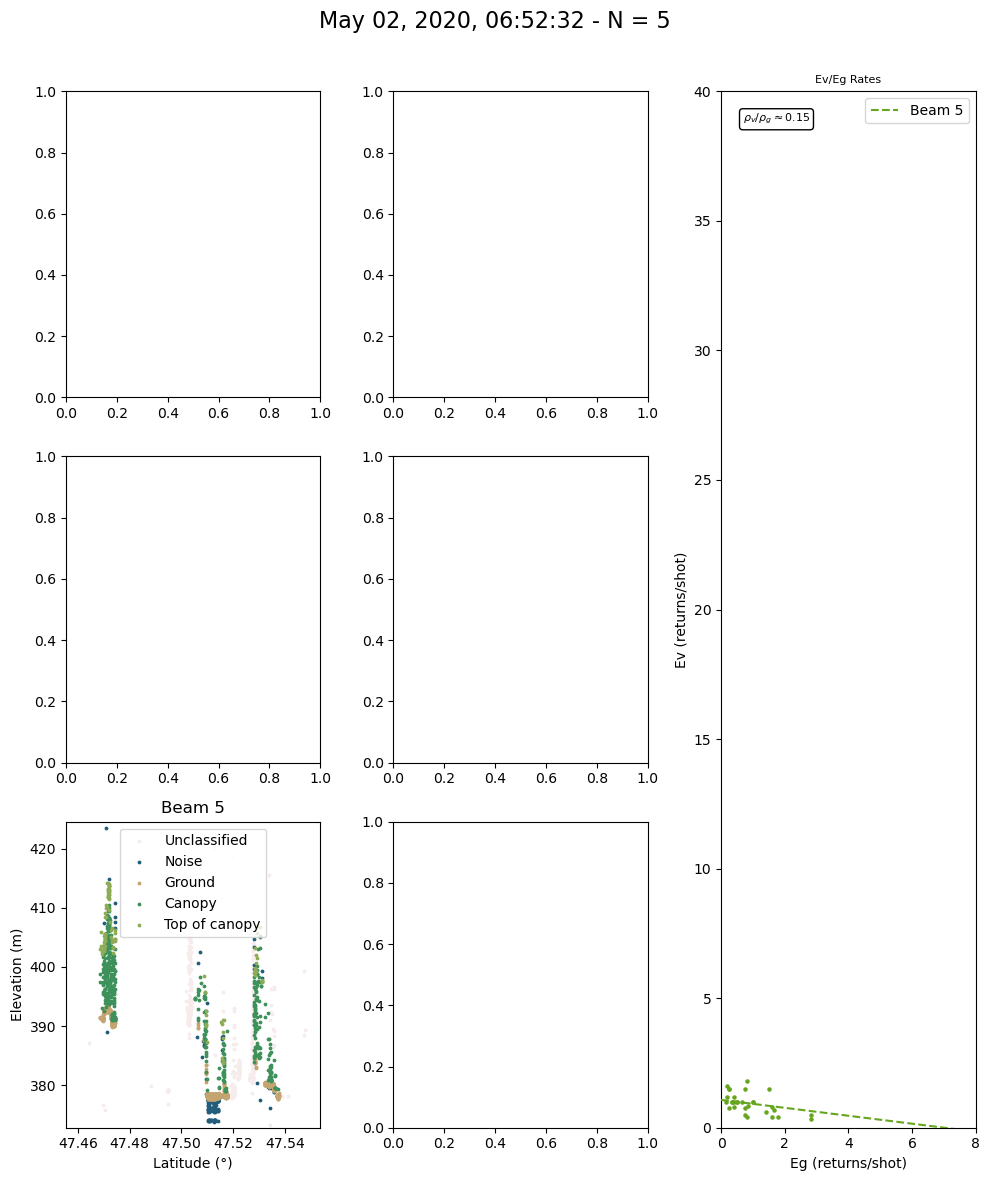

subset_can_flag
surf_type
subset_te_flag
The first part...
0.019757509231567383
The big compute...
0.7065050601959229
The unpacking...
0.000797271728515625
The trad canopy cover...
0.0016143321990966797
The sub_bin_canopy_metrics...
0.023186206817626953
Slope calc...
0.10085844993591309
Vertical Height Bins...
1.7856712341308594
Photons above threshold...
0.095428466796875
The last part...
0.0006148815155029297
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020031452178955078
The big compute...
0.3940868377685547
The unpacking...
0.0007717609405517578
The trad canopy cover...
0.0016126632690429688
The sub_bin_canopy_metrics...
0.020711421966552734
Slope calc...
0.03405308723449707
Vertical Height Bins...
1.0654916763305664
Photons above threshold...
0.05830049514770508
The last part...
0.0005977153778076172
subset_can_flag
surf_type
subset_te_flag
The first part...
0.021211862564086914
The big compute...
1.07786226272583
The unpacking...
0.0008144378662109375
The trad can

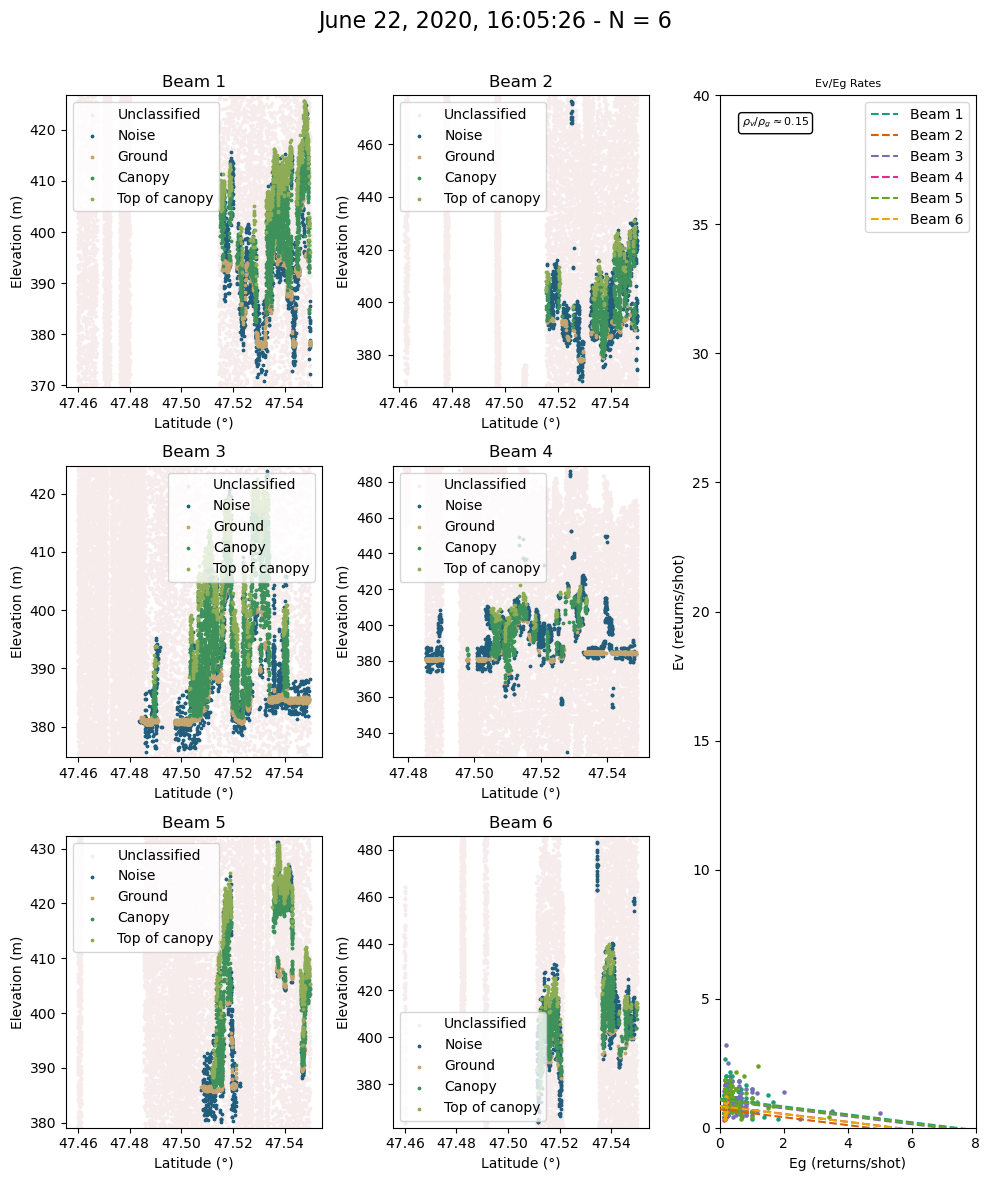

subset_can_flag
surf_type
subset_te_flag
The first part...
0.01997661590576172
The big compute...
1.6617398262023926
The unpacking...
0.0008332729339599609
The trad canopy cover...
0.001600027084350586
The sub_bin_canopy_metrics...
0.023774147033691406
Slope calc...
0.33088254928588867
Vertical Height Bins...
4.739508390426636
Photons above threshold...
0.2734496593475342
The last part...
0.0007498264312744141
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020248889923095703
The big compute...
1.0329890251159668
The unpacking...
0.0007917881011962891
The trad canopy cover...
0.0015869140625
The sub_bin_canopy_metrics...
0.02093052864074707
Slope calc...
0.15151143074035645
Vertical Height Bins...
3.1573846340179443
Photons above threshold...
0.1882343292236328
The last part...
0.0006151199340820312
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020648717880249023
The big compute...
1.6044902801513672
The unpacking...
0.0007874965667724609
The trad canopy cov

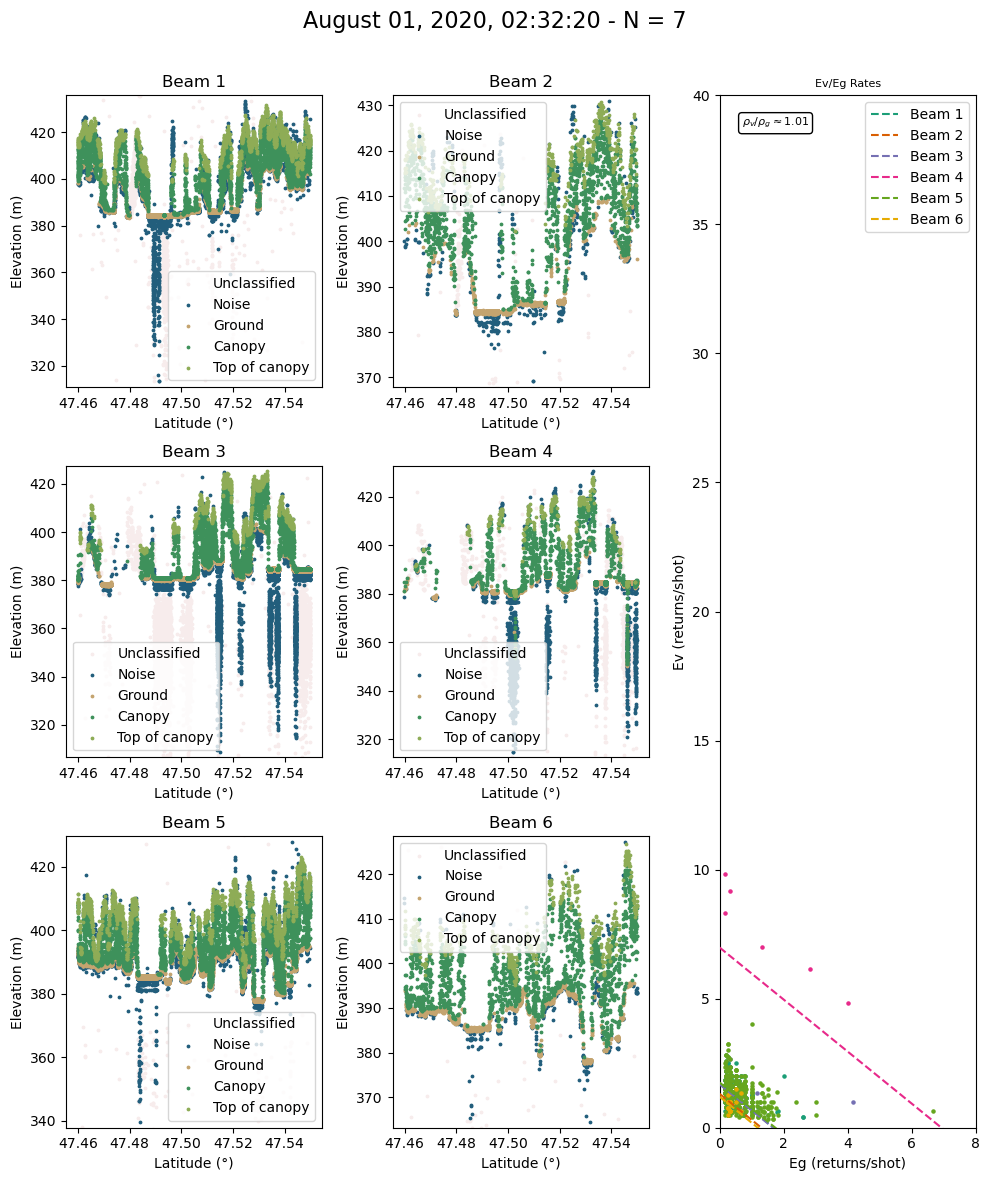

Nothing in rebinned section for marcell_MN file 8's beam 1.
Nothing in rebinned section for marcell_MN file 8's beam 2.
Nothing in rebinned section for marcell_MN file 8's beam 3.
Nothing in rebinned section for marcell_MN file 8's beam 4.
subset_can_flag
surf_type
subset_te_flag
The first part...
0.020247936248779297
The big compute...
1.6833686828613281
The unpacking...
0.0008137226104736328
The trad canopy cover...
0.0015878677368164062
The sub_bin_canopy_metrics...
0.0243072509765625
Slope calc...
0.39626002311706543
Vertical Height Bins...
4.625423908233643
Photons above threshold...
0.25876951217651367
The last part...
0.0007748603820800781
subset_can_flag
surf_type
subset_te_flag
The first part...
0.01960611343383789
The big compute...
1.2361066341400146
The unpacking...
0.0008318424224853516
The trad canopy cover...
0.0015799999237060547
The sub_bin_canopy_metrics...
0.02134537696838379
Slope calc...
0.25818300247192383
Vertical Height Bins...
2.9295692443847656
Photons above t

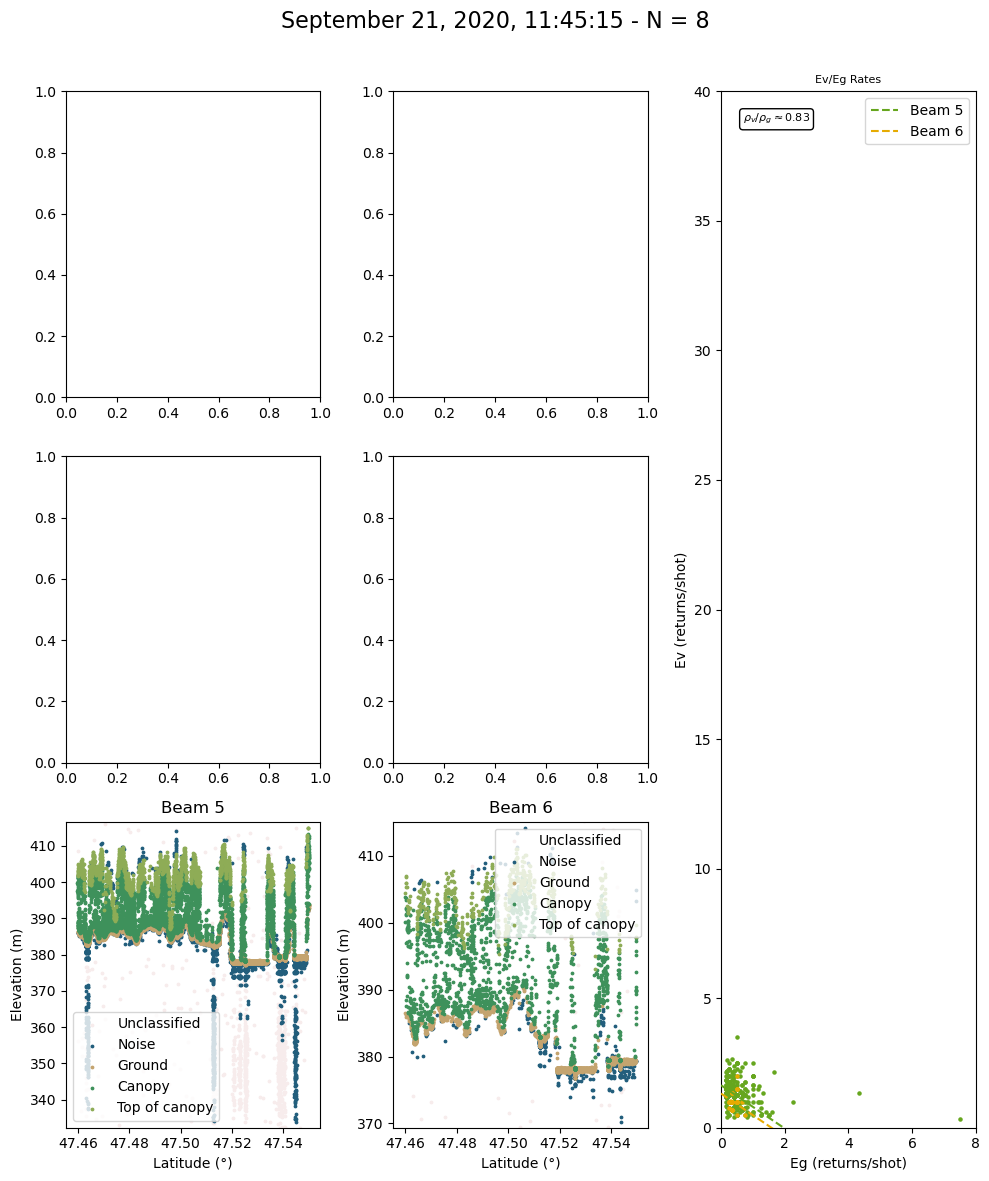

subset_can_flag
surf_type
subset_te_flag
The first part...
0.020093441009521484
The big compute...
1.8941574096679688
The unpacking...
0.0008347034454345703
The trad canopy cover...
0.0015647411346435547
The sub_bin_canopy_metrics...
0.025374174118041992
Slope calc...
0.579338788986206
Vertical Height Bins...
4.81848406791687
Photons above threshold...
0.2666161060333252
The last part...
0.0007543563842773438
subset_can_flag
surf_type
subset_te_flag
The first part...
0.02002739906311035
The big compute...
1.4664933681488037
The unpacking...
0.0007932186126708984
The trad canopy cover...
0.001577138900756836
The sub_bin_canopy_metrics...
0.02231454849243164
Slope calc...
0.3781852722167969
Vertical Height Bins...
3.254326105117798
Photons above threshold...
0.20691847801208496
The last part...
0.0008952617645263672
subset_can_flag
surf_type
subset_te_flag
The first part...
0.019932031631469727
The big compute...
1.6429822444915771
The unpacking...
0.0009088516235351562
The trad canopy c

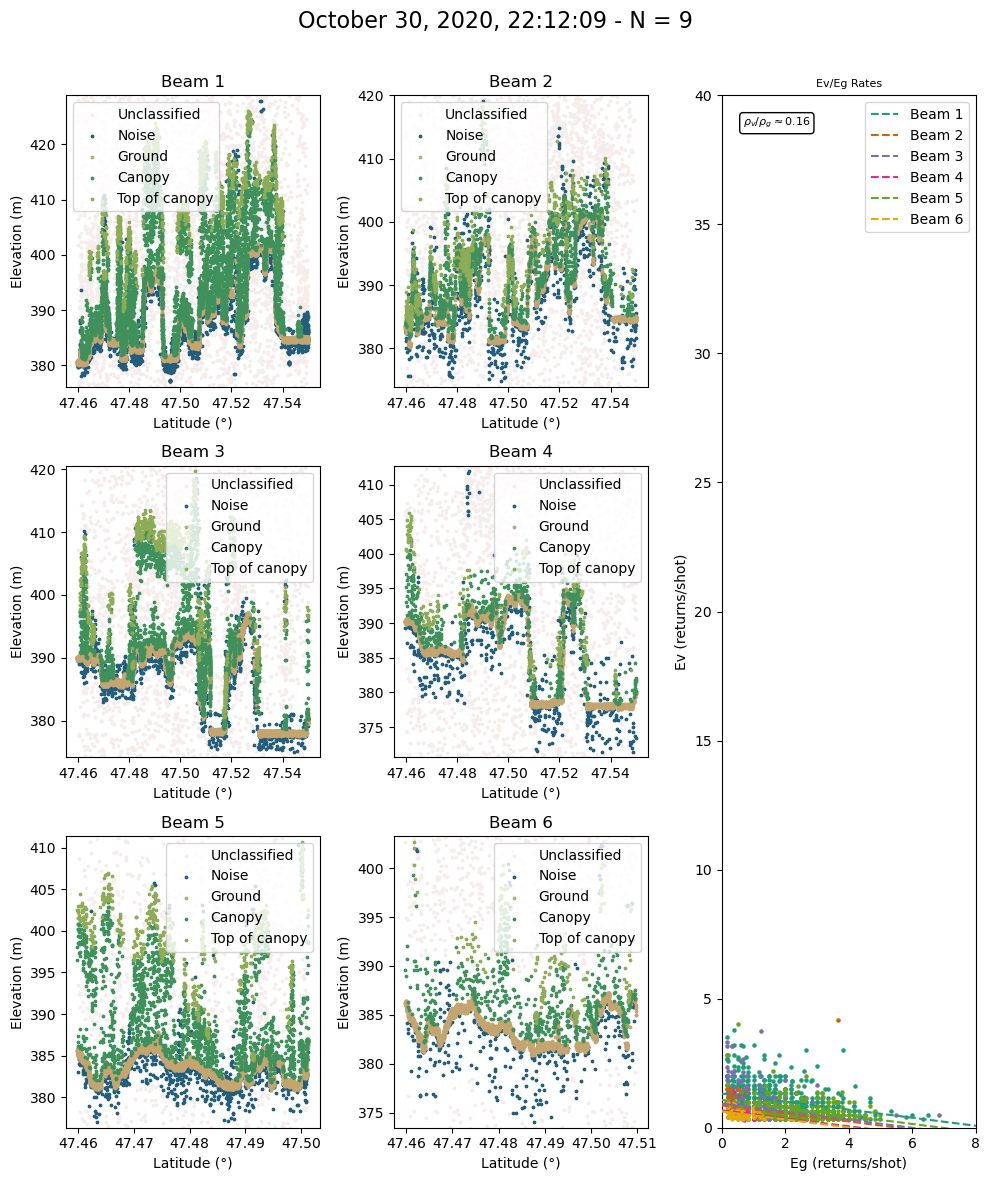

In [5]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/marcell_MN/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-93.4541, 47.5049)

for i in range(10):
# for i in [3,4,5,7,8]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
                         altitude=413, threshold=1, small_box=10, graph_detail=2, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Lacclair

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

[-1.9999999999999982, 1.4999999999999998]
-1.9999999999999982 69.07755278982137 0     0.074536
1     0.152994
2    -0.020328
3    -0.120404
4     0.065767
5     0.197300
6     0.000000
7     0.149071
8    -0.024845
9     0.000000
10   -0.095831
11   -0.014907
12   -0.092073
13   -0.152053
14    0.014907
Name: Eg, dtype: float64
-2.0000000298023206 69.07755278982137 0     7.453560e-02
1     1.529941e-01
2    -2.032789e-02
3    -1.204037e-01
4     6.576671e-02
5     1.973001e-01
6     2.221334e-09
7     1.490712e-01
8    -2.484520e-02
9     1.666000e-09
10   -9.583148e-02
11   -1.490712e-02
12   -9.207338e-02
13   -1.520526e-01
14    1.490712e-02
Name: Eg, dtype: float64
-1.9999999999999982 69.07755278982137 0     7.453559e-02
1     1.529941e-01
2    -2.032790e-02
3    -1.204037e-01
4     6.576670e-02
5     1.973001e-01
6    -9.996003e-09
7     1.490712e-01
8    -2.484521e-02
9    -9.996003e-09
10   -9.583149e-02
11   -1.490713e-02
12   -9.207340e-02
13   -1.520526e-01
14    1.490711e-02

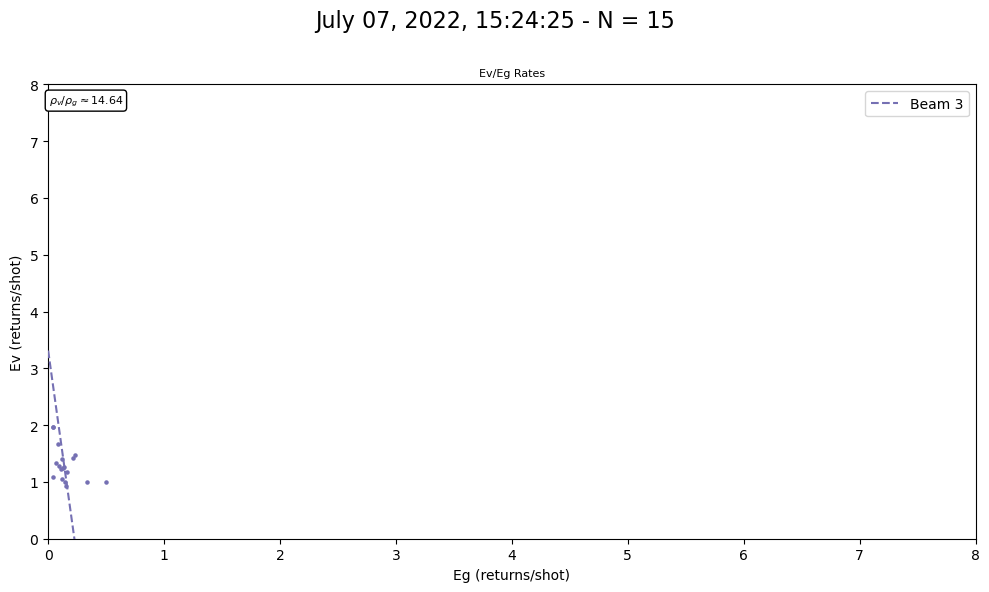

In [1]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/lacclair/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-71.6696, 46.9521)

# for i in range(8):
for i in [15]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=313, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
                         altitude=313, threshold=1, small_box=10, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=313, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

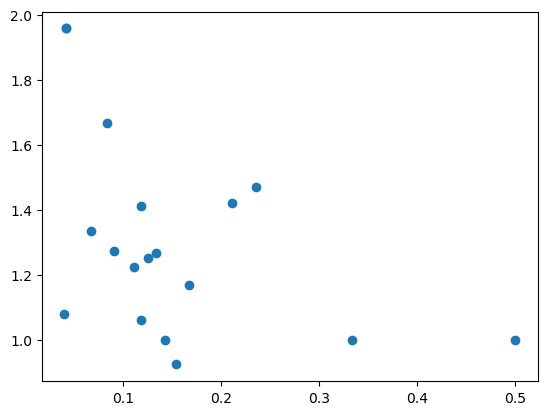

In [2]:
plt.scatter(data['Eg'], data['Ev'])

# Torgnon

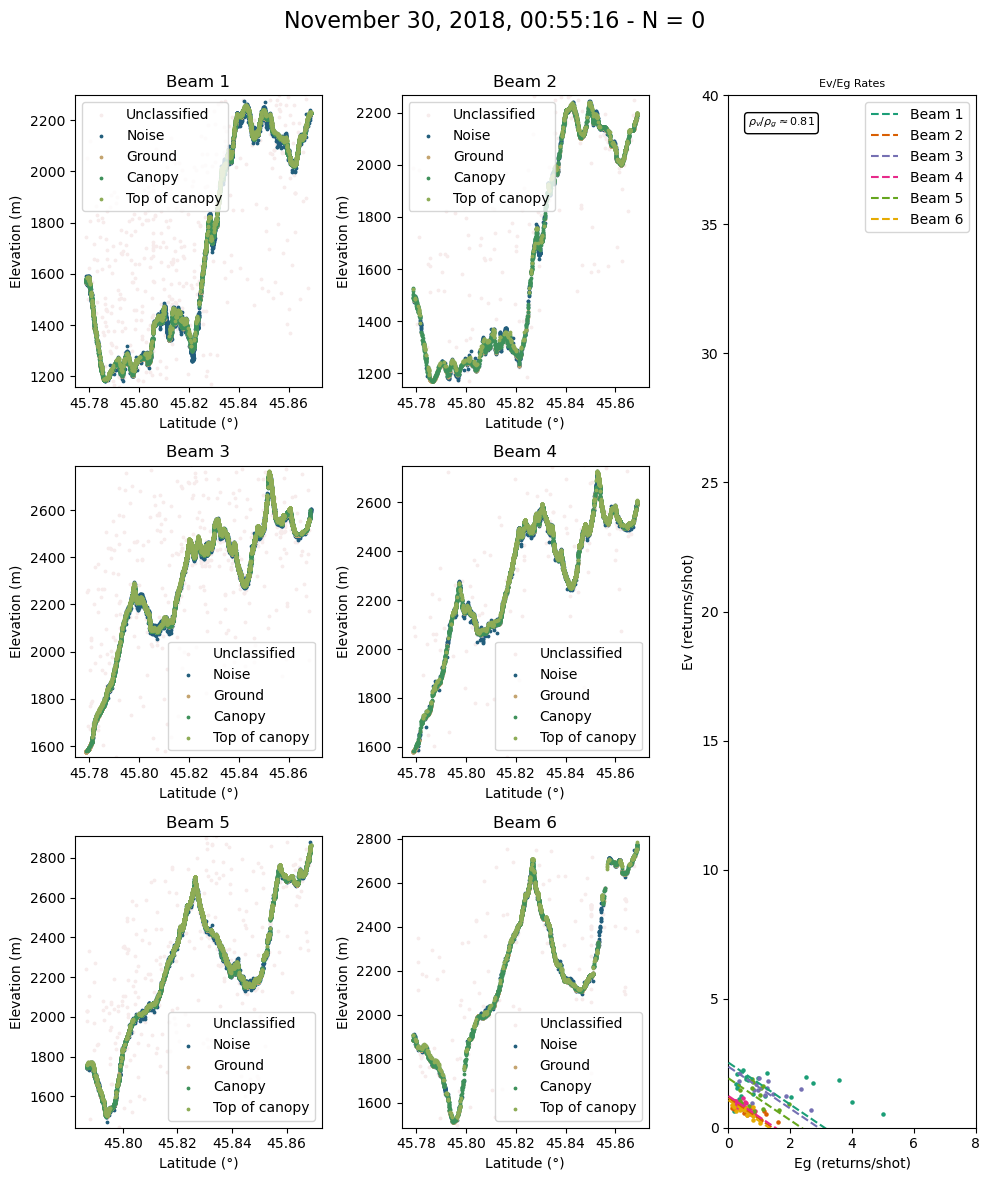

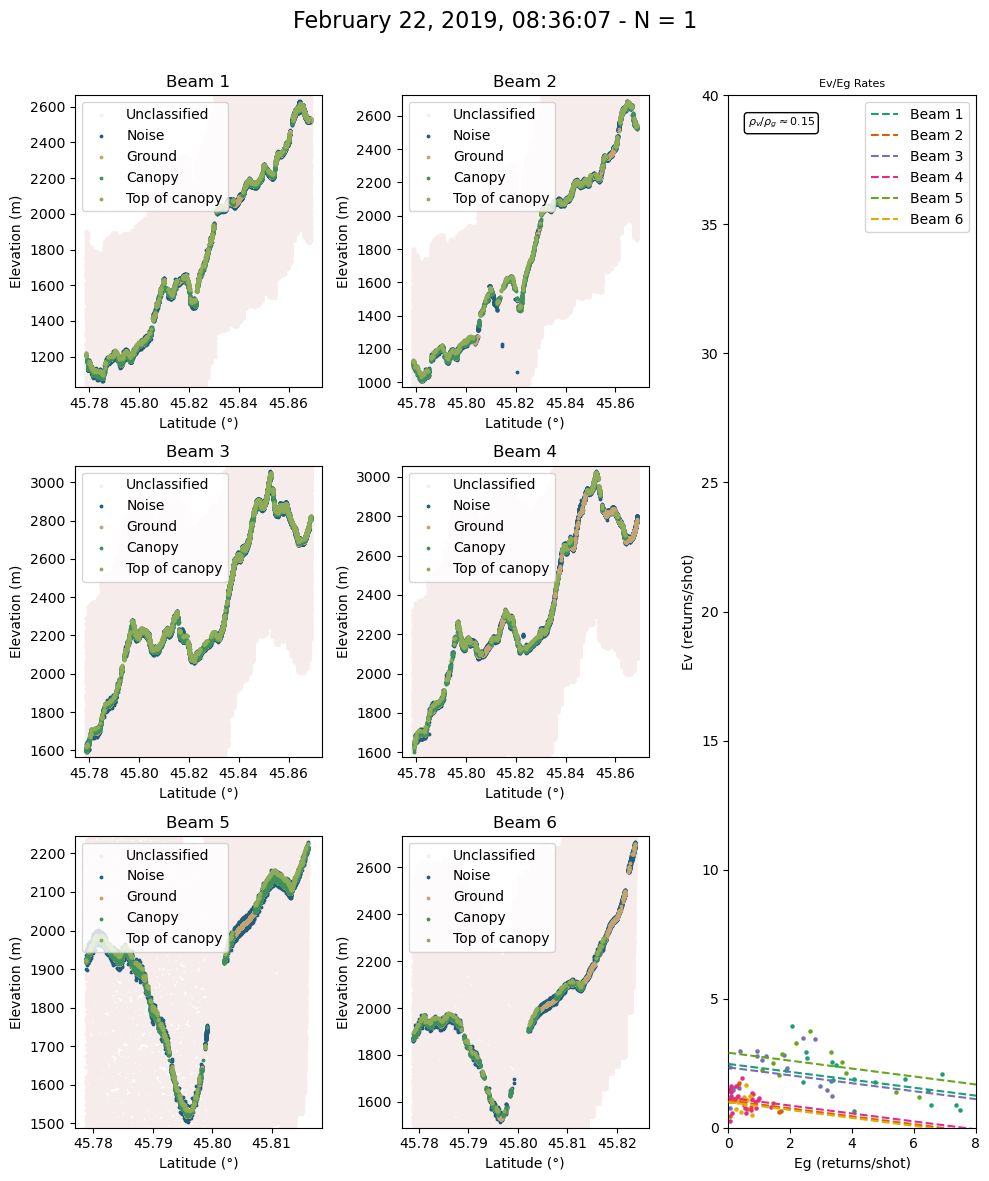

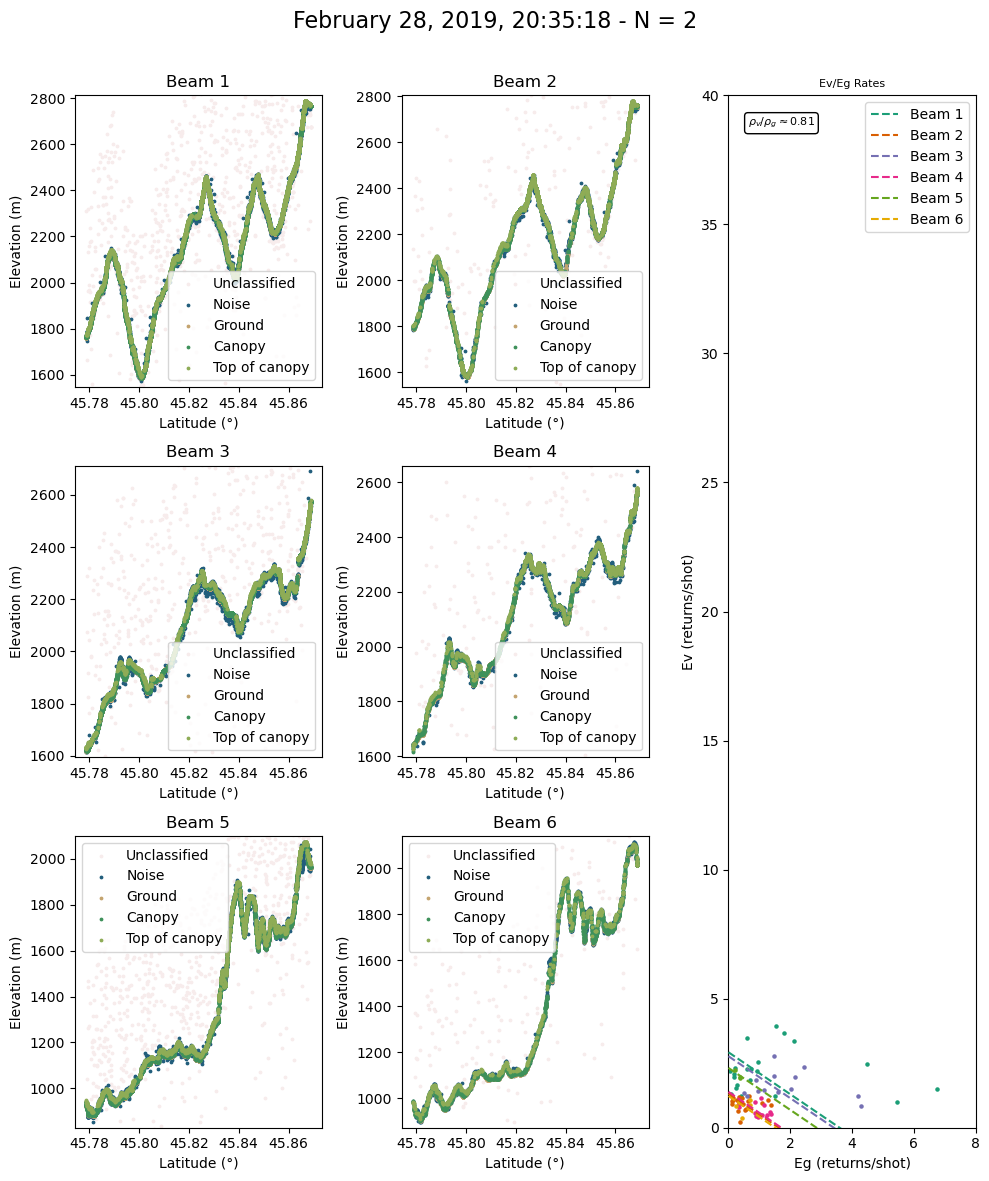

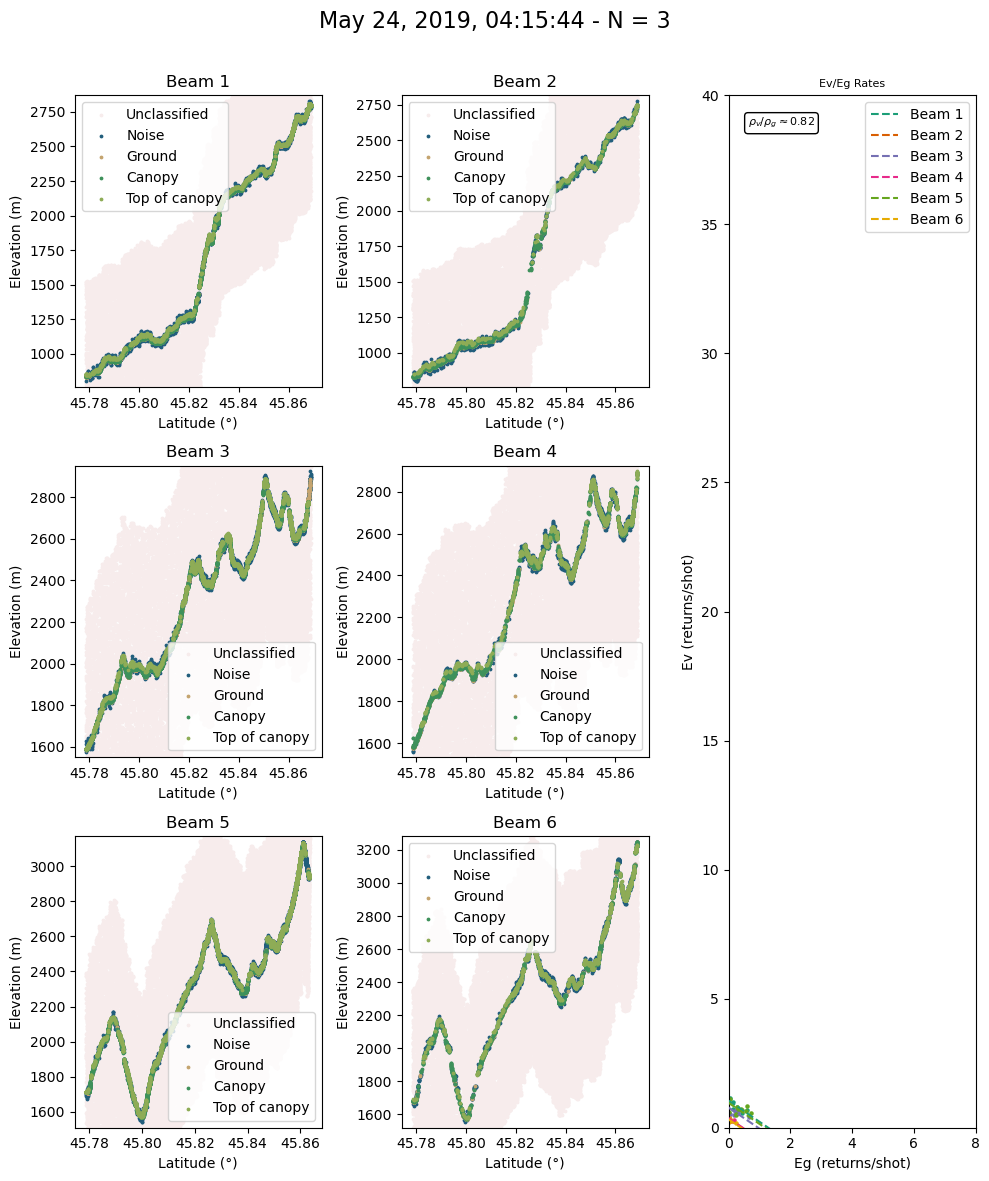

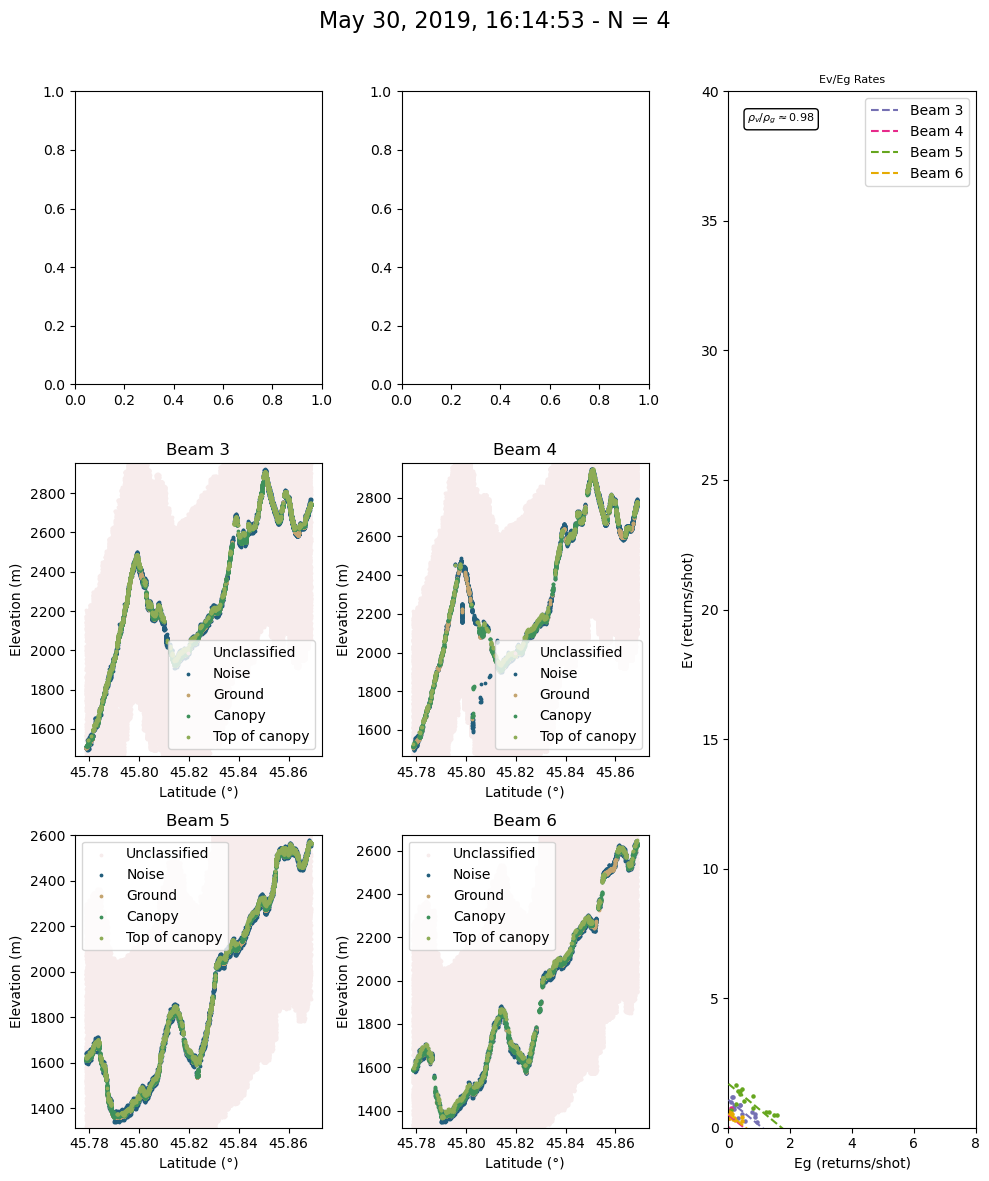

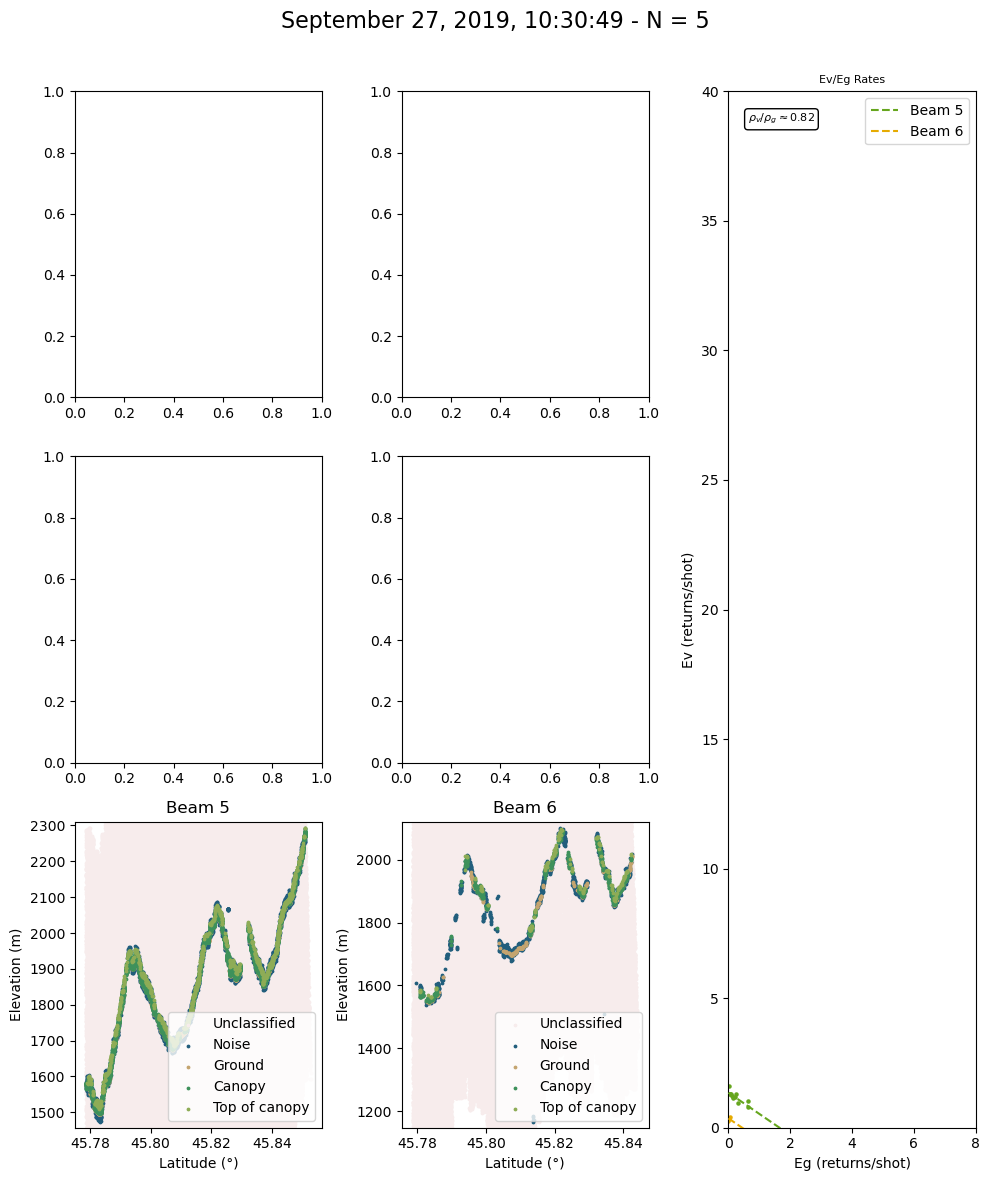

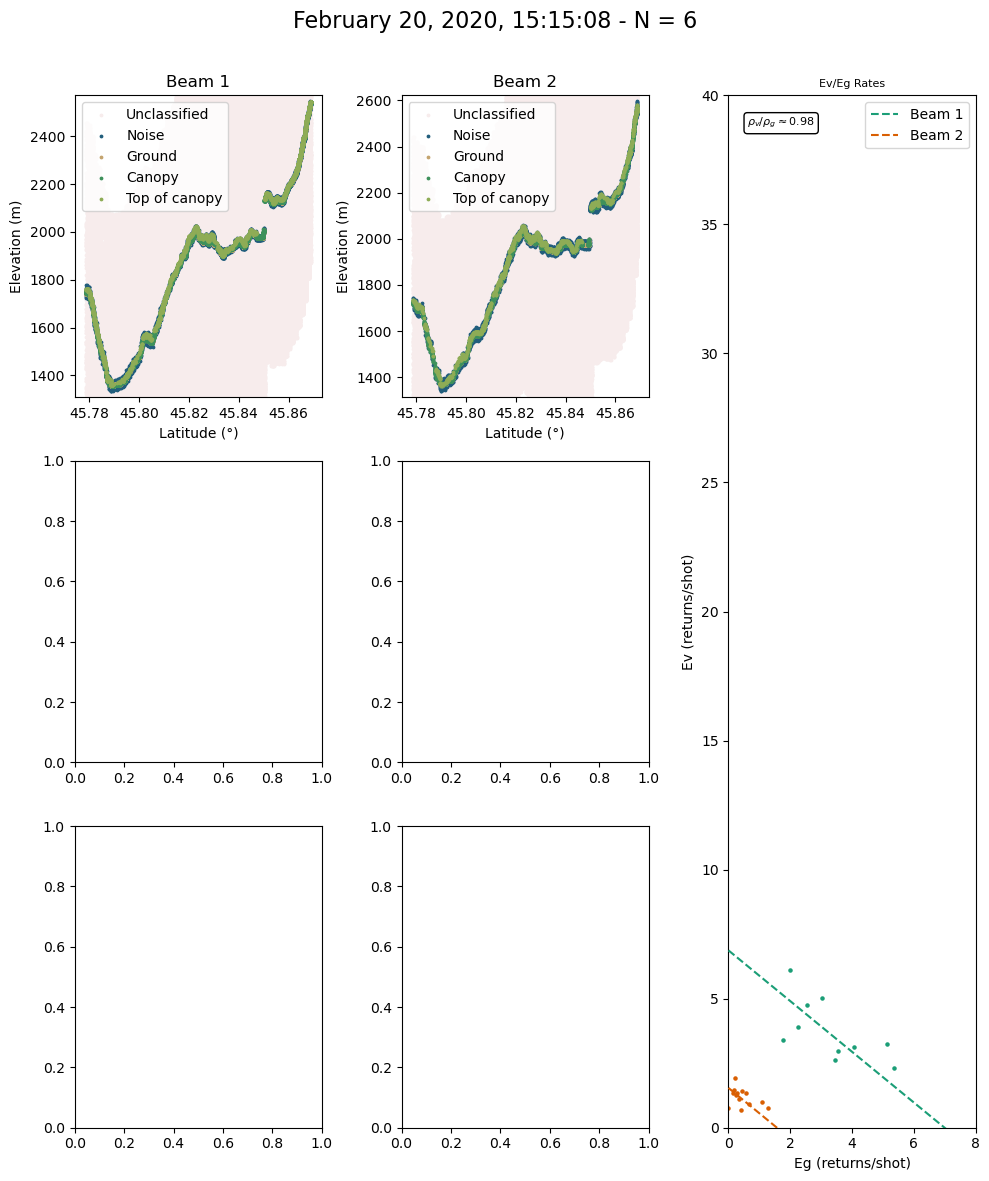

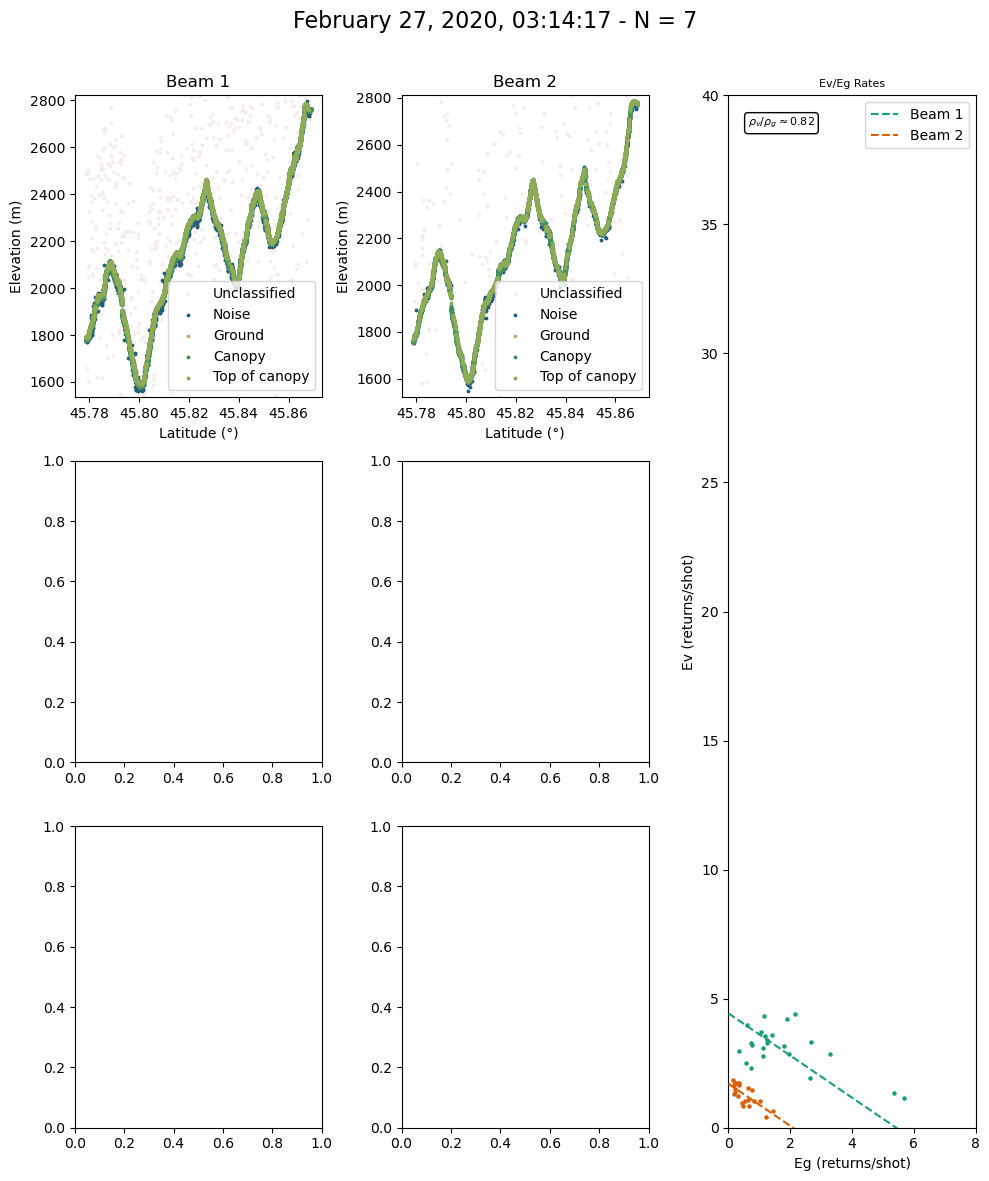

In [3]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/torgnon/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (7.5609, 45.8238)

for i in range(8):
# for i in [3,4,5,7,8]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=2091, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
                         altitude=2091, threshold=1, small_box=10, graph_detail=2, loss='linear', rebinned=0, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=2091, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Oregon Young Pine

Nothing in rebinned section for oregon_yp file 5's beam 1.
Nothing in rebinned section for oregon_yp file 5's beam 2.
subset_can_flag
surf_type
subset_te_flag
The first part...
0.017519474029541016
The big compute...
0.6993191242218018
The unpacking...
0.0007598400115966797
The trad canopy cover...
0.001477956771850586
The sub_bin_canopy_metrics...
0.011028289794921875
Slope calc...
0.18947196006774902
Vertical Height Bins...
1.4971911907196045
Photons above threshold...
0.08691549301147461
The last part...
0.0005998611450195312
subset_can_flag
surf_type
subset_te_flag
The first part...
0.017182111740112305
The big compute...
0.39091062545776367
The unpacking...
0.0007441043853759766
The trad canopy cover...
0.001474618911743164
The sub_bin_canopy_metrics...
0.008580207824707031
Slope calc...
0.11312079429626465
Vertical Height Bins...
0.33928370475769043
Photons above threshold...
0.017238378524780273
The last part...
0.0005750656127929688
subset_can_flag
surf_type
subset_te_flag
The 

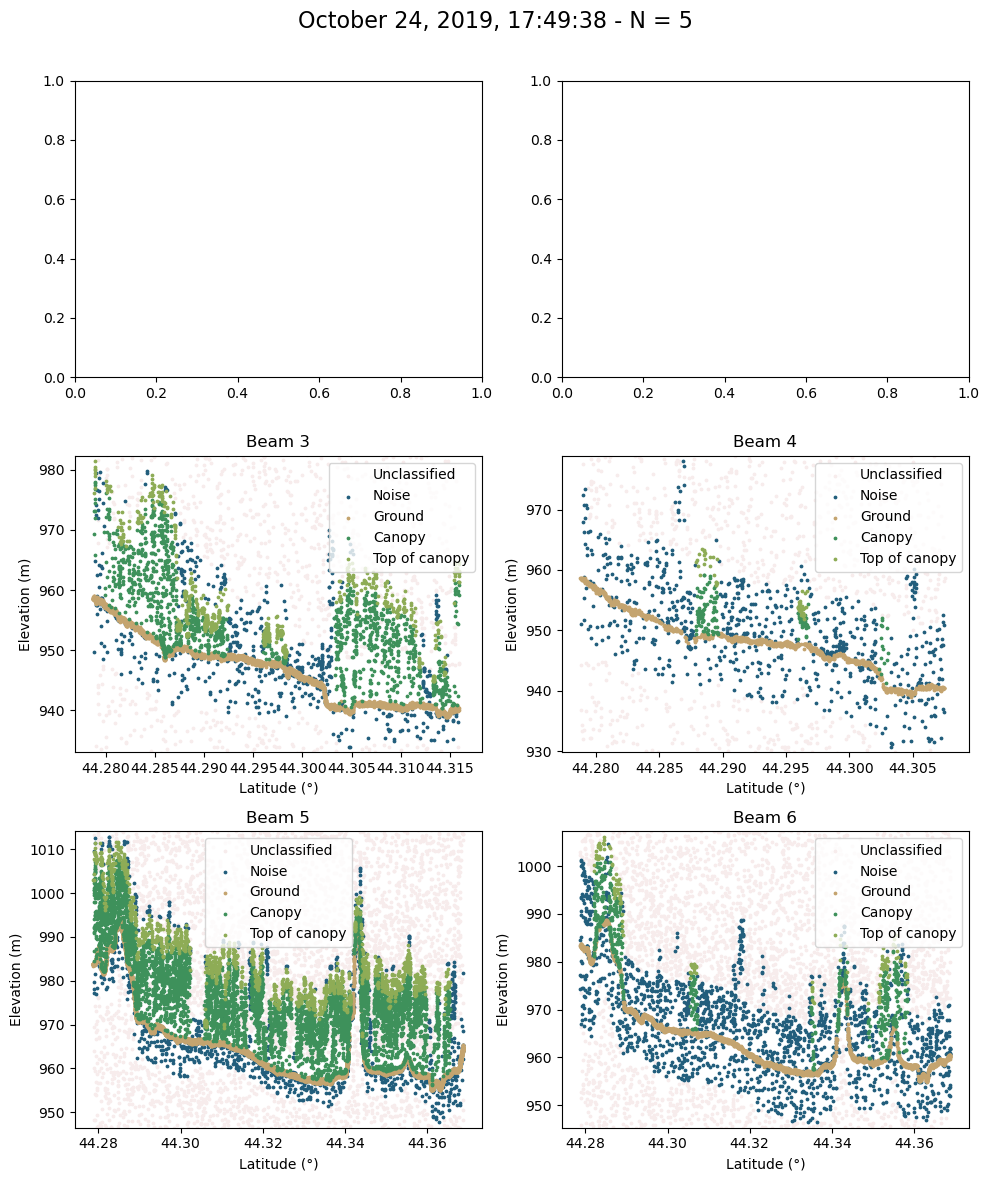

In [10]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/oregon_yp/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-121.606, 44.3238)

# for i in range(8):
for i in [5]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=977, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
                         altitude=977, threshold=1, small_box=10, graph_detail=3, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=977, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

subset_can_flag
surf_type
subset_te_flag
The first part...
0.018575429916381836
The big compute...
1.152801752090454
The unpacking...
0.0008256435394287109
The trad canopy cover...
0.00164031982421875
The sub_bin_canopy_metrics...
0.015655040740966797
Slope calc...
0.30492329597473145
Vertical Height Bins...
3.1143078804016113
Photons above threshold...
0.16763544082641602
The last part...
0.0006043910980224609
subset_can_flag
surf_type
subset_te_flag
The first part...
0.017775535583496094
The big compute...
0.7730813026428223
The unpacking...
0.0008604526519775391
The trad canopy cover...
0.001608133316040039
The sub_bin_canopy_metrics...
0.01205134391784668
Slope calc...
0.18818974494934082
Vertical Height Bins...
2.0415425300598145
Photons above threshold...
0.10694289207458496
The last part...
0.0006220340728759766
subset_can_flag
surf_type
subset_te_flag
The first part...
0.02028369903564453
The big compute...
1.7270619869232178
The unpacking...
0.0008814334869384766
The trad cano

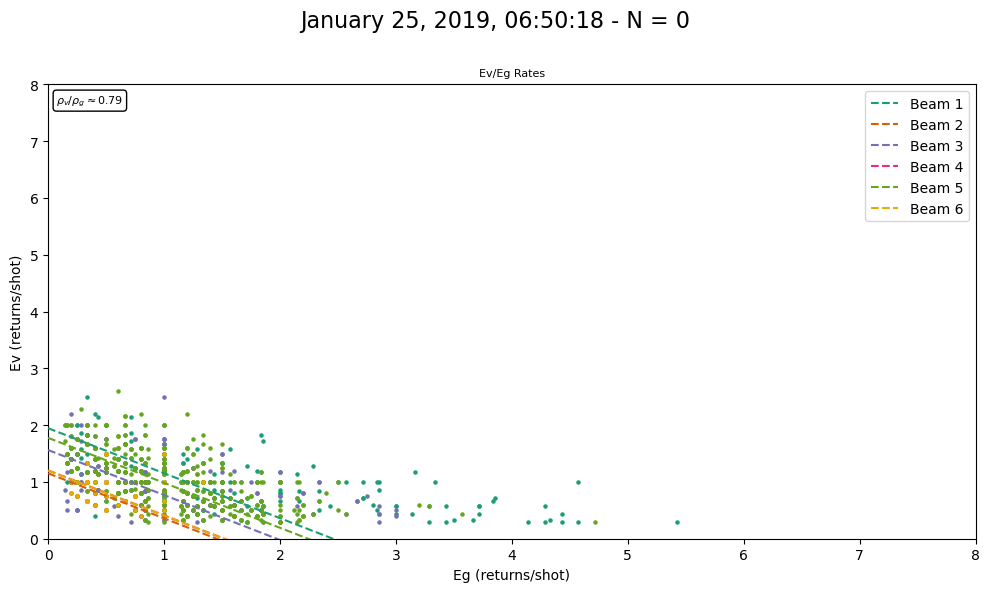

In [2]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/oregon_yp/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-121.606, 44.3238)

# for i in range(8):
for i in [0]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=977, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
                         altitude=977, threshold=1, small_box=10, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=977, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)